## Updated Dataset

The data being used was originally from inmate databases aquired from the Nebraska Department of Corrections Public Records. https://dcs-inmatesearch.ne.gov/Corrections/COR_download.htm

The Database was modified in NE_inmates_offenses_1.ipynb. It had unnessescary rows deleted, extra rows added for analysis, and was prepared for exploration and visualization. 

## 1. Load the Data

Load the data using Pandas. 

Pandas read_csv will load the data csv file as a Pandas DataFrame object. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('inmate_updatedClean_offenses.csv')

## 2. Check the First Few Rows of Data

The DataFrame's first five rows can be viewed using the .head() method

In [3]:
df.head()

,ID NUMBER,DATE OF BIRTH,RACE DESC,GENDER,FACILITY,SENTENCE BEGIN DATE,MIN TERM/YEAR,MAX TERM/YEAR,INST RELEASE DATE,ACTIVE,...,COUNTY COMMITTED,OFFENSE ARREST CD,OFFENSE ARREST,OFFENSE GROUP,OFFENSE CATEGORY,SENTENCE BEGIN DATE DT,DATE OF BIRTH DT,SENTENCE BEGIN AGE,CURRENT AGE,SENTENCE BEGIN YEAR
0,27642,1955-05-18,BLACK,MALE,NaN,2015-12-01,90,95,2016-08-25,0,...,DOUGLAS,B01,MURDER 1ST DEGREE,Homicide,Person,2015-12-01,1955-05-18,60.580822,65.852055,2015
1,27642,1955-05-18,BLACK,MALE,NaN,2015-12-01,90,95,2016-08-25,0,...,LANCASTER,B24,SODOMY,Sex Offenses,Sex Offenses,2015-12-01,1955-05-18,60.580822,65.852055,2015
2,27739,1936-04-06,WHITE,MALE,NaN,1982-11-15,5,11,1986-07-23,0,...,DOUGLAS,D11,BURGLARY,Burglary,Property,1982-11-15,1936-04-06,46.641096,84.978082,1982
3,27739,1936-04-06,WHITE,MALE,NaN,1982-11-15,5,11,1986-07-23,0,...,DOUGLAS,H50,ESCAPE,Other,Other,1982-11-15,1936-04-06,46.641096,84.978082,1982
4,27739,1936-04-06,WHITE,MALE,NaN,1982-11-15,5,11,1986-07-23,0,...,DOUGLAS,D11,BURGLARY,Burglary,Property,1982-11-15,1936-04-06,46.641096,84.978082,1982


## 3. Description of Data

The DataFrame info() method is used to see helpful descriptions of the data, such as the column name and number of rows. The 'Non-Null Count' is the number of rows that have a value for that particular column. The 'Dtype' is the data type found within each column. An int64 is an integer, an object type is usually written text, and datetime64 is a date time value. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114765 entries, 0 to 114764
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID NUMBER                     114765 non-null  int64  
 1   DATE OF BIRTH                 114765 non-null  object 
 2   RACE DESC                     114765 non-null  object 
 3   GENDER                        114765 non-null  object 
 4   FACILITY                      24703 non-null   object 
 5   SENTENCE BEGIN DATE           114765 non-null  object 
 6   MIN TERM/YEAR                 114765 non-null  object 
 7   MAX TERM/YEAR                 114765 non-null  object 
 8   INST RELEASE DATE             103618 non-null  object 
 9   ACTIVE                        114765 non-null  int64  
 10  OFFENSE MINIMUM YEAR OR TERM  114765 non-null  float64
 11  OFFENSE MAXIMUM YEAR OR TERM  114765 non-null  float64
 12  OFFENSE ARREST DESC           114765 non-nul

## 4. Creating An Active Inmate DataFrame

A new DataFrame containing only active inmates can be created by making a new DataFrame from the same info as before but selecting only inmates marked active.

In [5]:
dfActive = df[df.ACTIVE == 1]

In [6]:
dfActive.head()

,ID NUMBER,DATE OF BIRTH,RACE DESC,GENDER,FACILITY,SENTENCE BEGIN DATE,MIN TERM/YEAR,MAX TERM/YEAR,INST RELEASE DATE,ACTIVE,...,COUNTY COMMITTED,OFFENSE ARREST CD,OFFENSE ARREST,OFFENSE GROUP,OFFENSE CATEGORY,SENTENCE BEGIN DATE DT,DATE OF BIRTH DT,SENTENCE BEGIN AGE,CURRENT AGE,SENTENCE BEGIN YEAR
23,29333,1956-07-22,WHITE,MALE,LINCOLN CORRECTIONAL CENTER,2017-02-03,110,126,NaN,1,...,DOUGLAS,B01,MURDER 1ST DEGREE,Homicide,Person,2017-02-03,1956-07-22,60.578082,64.671233,2017
40,31404,1960-09-14,WHITE,MALE,TECUMSEH STATE COR INSTITUTION,2017-01-03,83,132,NaN,1,...,HALL,B01,MURDER 1ST DEGREE,Homicide,Person,2017-01-03,1960-09-14,56.342466,60.520548,2017
41,31404,1960-09-14,WHITE,MALE,TECUMSEH STATE COR INSTITUTION,2017-01-03,83,132,NaN,1,...,LANCASTER,B11,ASSAULT 1ST DEGREE,Assault,Person,2017-01-03,1960-09-14,56.342466,60.520548,2017
42,31404,1960-09-14,WHITE,MALE,TECUMSEH STATE COR INSTITUTION,2017-01-03,83,132,NaN,1,...,LANCASTER,B11,ASSAULT 1ST DEGREE,Assault,Person,2017-01-03,1960-09-14,56.342466,60.520548,2017
43,31404,1960-09-14,WHITE,MALE,TECUMSEH STATE COR INSTITUTION,2017-01-03,83,132,NaN,1,...,LANCASTER,K02,USE FIREARM TO COMMIT FELONY,Weapons,Person,2017-01-03,1960-09-14,56.342466,60.520548,2017


In [7]:
dfActive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17599 entries, 23 to 113609
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID NUMBER                     17599 non-null  int64  
 1   DATE OF BIRTH                 17599 non-null  object 
 2   RACE DESC                     17599 non-null  object 
 3   GENDER                        17599 non-null  object 
 4   FACILITY                      17513 non-null  object 
 5   SENTENCE BEGIN DATE           17599 non-null  object 
 6   MIN TERM/YEAR                 17599 non-null  object 
 7   MAX TERM/YEAR                 17599 non-null  object 
 8   INST RELEASE DATE             7320 non-null   object 
 9   ACTIVE                        17599 non-null  int64  
 10  OFFENSE MINIMUM YEAR OR TERM  17599 non-null  float64
 11  OFFENSE MAXIMUM YEAR OR TERM  17599 non-null  float64
 12  OFFENSE ARREST DESC           17599 non-null  object 
 13 

## 5. Creating a New DataFrame for each Decade

Each decade is separted out into their own DataFrame by selecting only inmates incarcerated within that time span. 

In [8]:
#1980s decade
d1980 = (df['SENTENCE BEGIN YEAR'] > 1979) & (df['SENTENCE BEGIN YEAR'] <= 1989)
df1980 = pd.DataFrame(df.loc[d1980])

In [9]:
#1990s decade
d1990 = (df['SENTENCE BEGIN YEAR'] > 1989) & (df['SENTENCE BEGIN YEAR'] <= 1999)
df1990 = pd.DataFrame(df.loc[d1990])

In [10]:
#2000s decade
d2000 = (df['SENTENCE BEGIN YEAR'] > 1999) & (df['SENTENCE BEGIN YEAR'] <= 2009)
df2000 = pd.DataFrame(df.loc[d2000])

In [11]:
#2010s decade
d2010 = (df['SENTENCE BEGIN YEAR'] > 2009) & (df['SENTENCE BEGIN YEAR'] <= 2019)
df2010 = pd.DataFrame(df.loc[d2010])

## 6. Viewing the Data

The DataFrame describe method helps us take a broad look at the numerical data. It shows the count, mean, standard deviation, maximum and minimum values

The noteworthy numbers are the mean, min, and max values for OFFENSE MINIMUM / MAXIMUM YEAR OR TERM, SENTENCE BEGIN AGE, and CURRENT AGE 

In [12]:
df.describe()

,ID NUMBER,ACTIVE,OFFENSE MINIMUM YEAR OR TERM,OFFENSE MAXIMUM YEAR OR TERM,SENTENCE BEGIN AGE,CURRENT AGE,SENTENCE BEGIN YEAR
count,114765.000000,114765.000000,114765.000000,114765.000000,114765.000000,114765.000000,114765.000000
mean,79649.905755,0.153348,2.390799,4.255914,31.624433,47.407969,2004.917301
std,60996.021658,0.360324,5.417411,6.977242,10.301393,13.335310,10.519024
min,27642.000000,0.000000,0.000000,0.000000,13.660274,16.824658,1980.000000
25%,51834.000000,0.000000,0.000000,1.000000,23.210959,36.994521,1997.000000
50%,69025.000000,0.000000,1.000000,3.000000,29.597260,46.506849,2007.000000
75%,85383.000000,0.000000,2.000000,5.000000,38.024658,57.252055,2014.000000
max,502235.000000,1.000000,201.000000,126.000000,90.027397,121.249315,2020.000000


The same method is used with the active inmate database

In [13]:
dfActive.describe()

,ID NUMBER,ACTIVE,OFFENSE MINIMUM YEAR OR TERM,OFFENSE MAXIMUM YEAR OR TERM,SENTENCE BEGIN AGE,CURRENT AGE,SENTENCE BEGIN YEAR
count,17599.000000,17599.0,17599.000000,17599.000000,17599.000000,17599.000000,17599.000000
mean,119238.296153,1.0,6.679414,9.735155,33.009940,38.771791,2014.929769
std,77429.691425,0.0,11.233629,13.895484,10.646788,11.657834,6.576930
min,29333.000000,1.0,0.000000,0.000000,15.095890,16.824658,1980.000000
25%,79149.500000,1.0,0.000000,1.000000,24.693151,29.904110,2013.000000
50%,87238.000000,1.0,2.000000,4.000000,31.180822,36.767123,2018.000000
75%,99898.000000,1.0,8.000000,12.000000,39.087671,45.597260,2019.000000
max,392481.000000,1.0,110.000000,126.000000,86.271233,90.750685,2020.000000


## 7. Exploring Full Value Counts, Value Averages, and Visualizations 

Value counts is a pandas method that returns a list of the counts of every value in the column ordered by most common to least common.
This is helpful to distinguish what aspects of inmates were the most common

### 7.1 General Info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114765 entries, 0 to 114764
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID NUMBER                     114765 non-null  int64  
 1   DATE OF BIRTH                 114765 non-null  object 
 2   RACE DESC                     114765 non-null  object 
 3   GENDER                        114765 non-null  object 
 4   FACILITY                      24703 non-null   object 
 5   SENTENCE BEGIN DATE           114765 non-null  object 
 6   MIN TERM/YEAR                 114765 non-null  object 
 7   MAX TERM/YEAR                 114765 non-null  object 
 8   INST RELEASE DATE             103618 non-null  object 
 9   ACTIVE                        114765 non-null  int64  
 10  OFFENSE MINIMUM YEAR OR TERM  114765 non-null  float64
 11  OFFENSE MAXIMUM YEAR OR TERM  114765 non-null  float64
 12  OFFENSE ARREST DESC           114765 non-nul

### 7.2 Offense Group

The offense group is the broad family of offenses that the specific offense is a part of

Nearly 20% of offenses are drug-related.

In [15]:
df.value_counts('OFFENSE GROUP', normalize=True).head(10)

OFFENSE GROUP
Drugs            0.199756
Theft            0.135433
Assault          0.129377
Motor Vehicle    0.095534
Other            0.086882
Burglary         0.084015
Sex Offenses     0.070832
Weapons          0.065090
Fraud            0.061700
Robbery          0.038191
dtype: float64

### 7.3 Offense Category

The offense catagory describes more about the broad groups the offenses are in. The "Person" value means that the crime was committed against a person. Burglarary and theft would both be in the "Property" value.

In [16]:
df.value_counts('OFFENSE CATEGORY', normalize=True).head(10)

OFFENSE CATEGORY
Other           0.282067
Person          0.224204
Property        0.223071
Drugs           0.199808
Sex Offenses    0.070850
dtype: float64

### 7.4 Felony/Misdemeanor Code

The felony/misdemeanor code describes what felony or misdemeaner class the offense is in. 

35% of offenses are Class IV felonies, the least serious felony charge, and often includes crimes like forgery.

In [17]:
df.value_counts('FELONY MSDMNR CODE', normalize=True).head(10)

FELONY MSDMNR CODE
CLASS IV FELONY         0.342624
CLASS III FELONY        0.190004
CLASS I MISDEMEANOR     0.099582
CLASS II FELONY         0.090632
CLASS IIIA FELONY       0.090422
FELONY                  0.083287
CLASS IIA FELONY        0.029943
CLASS II MISDEMEANOR    0.015378
CLASS ID FELONY         0.012770
MISDEMEANOR             0.011910
dtype: float64

### 7.5 Offense Arrest

Offense Arrest names the specific type of offense when the inmate is incarcerated.

The top two values are drug-realted charges, possesion of a controlled substance and dealing or distributing the controlled substance.

In [18]:
df.value_counts('OFFENSE ARREST', normalize=True).head(10)

OFFENSE ARREST
POS CNTRL SUB EXCEPT MARIJUANA    0.095568
MANU/DIST/DEL/DISP OR POSS W/I    0.090757
BURGLARY                          0.080403
ROBBERY                           0.038184
THEFT BY UNLWFL TAKING OR DISP    0.036972
FORGERY 2ND DEGREE                0.034488
THEFT BY RECEIVING STOLEN PROP    0.034079
DRIVING WHILE INTOXICATED         0.032701
DRIVING UNDER REVOKED LICENSE     0.032135
THEFT                             0.030104
dtype: float64

### 7.6 Offense Type Code

Offense Type Code denotes what offense number it is for the inmate.

A '*' value denotes that it is the crime the inmate is incarcerated for, all concurrent or consecutive offenses they are charged with are marked by an A, B, C and so on. 

In [19]:
df.value_counts('OFFENSE TYPE CODE', normalize=True)

OFFENSE TYPE CODE
*    0.873359
A    0.101102
B    0.018804
C    0.004444
D    0.001516
E    0.000401
F    0.000192
G    0.000122
I    0.000026
H    0.000017
S    0.000009
N    0.000009
dtype: float64

### 7.7 County Committed

This shows the country the crimes took place in.

In [20]:
df.value_counts('COUNTY COMMITTED', normalize=True).head(10)

COUNTY COMMITTED
DOUGLAS         0.329641
LANCASTER       0.155300
HALL            0.053143
SARPY           0.050904
MADISON         0.036542
SCOTTS BLUFF    0.026929
BUFFALO         0.026136
DODGE           0.024393
ADAMS           0.018676
PLATTE          0.018301
dtype: float64

The normalize parameters returns the frequencies of the values

### 7.8 Offense Minimum/Maximum Sentencing 

The .mean() function shows the average of all the values (in this case, the offense's minimum sentence).

In [21]:
df['OFFENSE MINIMUM YEAR OR TERM'].mean()

2.3907985884198144

This shows the top minimum sentencing values for offenses.

In [22]:
df.value_counts('OFFENSE MINIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MINIMUM YEAR OR TERM
1.0     0.393334
0.0     0.277262
2.0     0.100876
3.0     0.073054
4.0     0.036814
5.0     0.035037
10.0    0.019771
6.0     0.016233
8.0     0.008705
15.0    0.006187
dtype: float64

The same numbers are pulled for maximum sentencing.

In [23]:
df['OFFENSE MAXIMUM YEAR OR TERM'].mean()

4.255914259573912

In [24]:
df.value_counts('OFFENSE MAXIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MAXIMUM YEAR OR TERM
1.0     0.227839
3.0     0.141681
2.0     0.136923
0.0     0.132601
5.0     0.130162
4.0     0.072879
10.0    0.032057
6.0     0.028615
20.0    0.018046
8.0     0.017592
dtype: float64

### 7.9 Visualizations 

seaborn and matplotlib are visualization libraries 

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

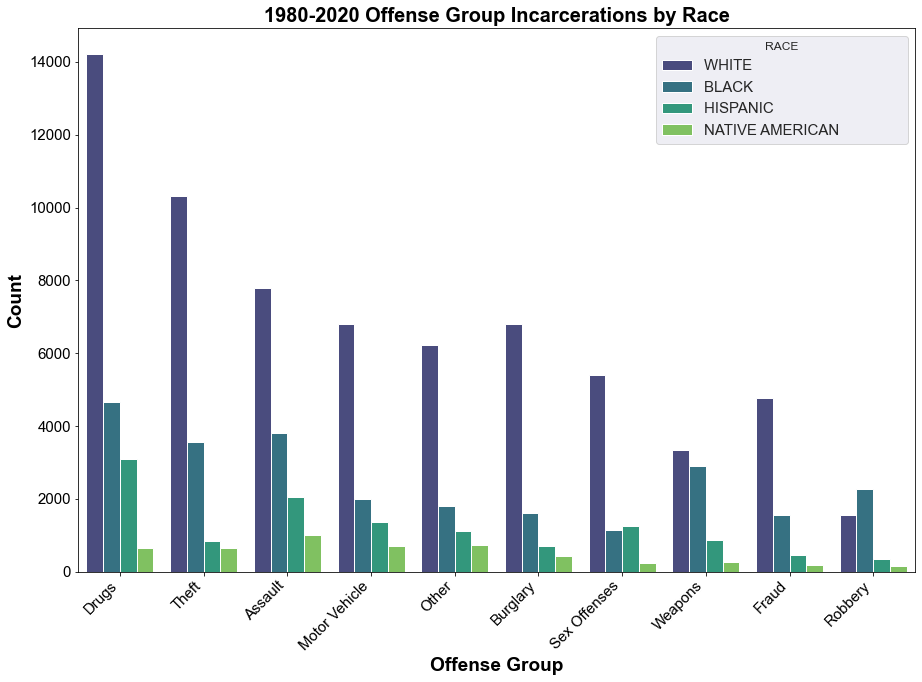

In [26]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE GROUP", hue="RACE DESC", ax=ax
                   , data=df, 
                   palette='viridis',
                    order=df["OFFENSE GROUP"].value_counts().iloc[:10].index,
                  hue_order=df["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Group',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('1980-2020 Offense Group Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, bbox_to_anchor = (1, 1))

offense arrests

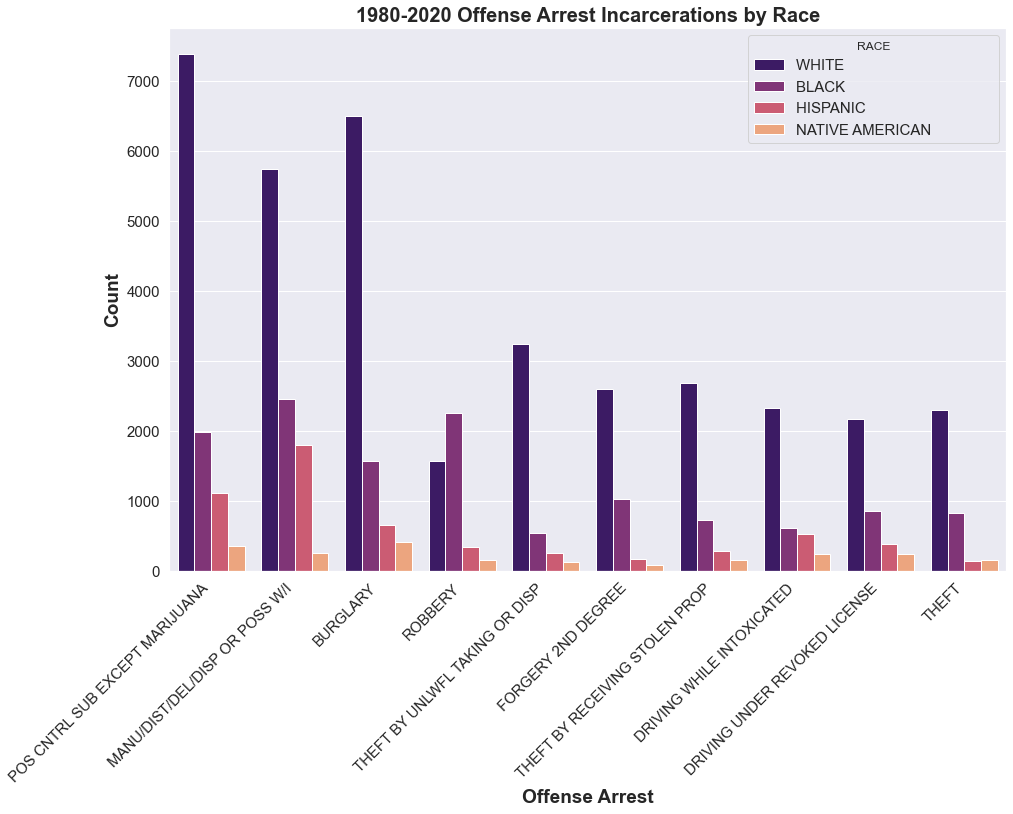

In [27]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE ARREST", hue="RACE DESC", ax=ax
                   , data=df, 
                   palette='magma',
                    order=df["OFFENSE ARREST"].value_counts().iloc[:10].index,
                  hue_order=df["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Arrest',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('1980-2020 Offense Arrest Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, loc='upper right',bbox_to_anchor = (1, 1))

## 8. Exploring 1980s Value Counts, Value Averages, and Visualizations 

### 8.1 General Info

In [28]:
df1980.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11943 entries, 2 to 96123
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID NUMBER                     11943 non-null  int64  
 1   DATE OF BIRTH                 11943 non-null  object 
 2   RACE DESC                     11943 non-null  object 
 3   GENDER                        11943 non-null  object 
 4   FACILITY                      919 non-null    object 
 5   SENTENCE BEGIN DATE           11943 non-null  object 
 6   MIN TERM/YEAR                 11943 non-null  object 
 7   MAX TERM/YEAR                 11943 non-null  object 
 8   INST RELEASE DATE             11794 non-null  object 
 9   ACTIVE                        11943 non-null  int64  
 10  OFFENSE MINIMUM YEAR OR TERM  11943 non-null  float64
 11  OFFENSE MAXIMUM YEAR OR TERM  11943 non-null  float64
 12  OFFENSE ARREST DESC           11943 non-null  object 
 13  F

### 8.2 Offense Group

Most offenses in the 1980s were burglary and theft.

In [29]:
df1980.value_counts('OFFENSE GROUP', normalize=True).head(10)

OFFENSE GROUP
Burglary         0.168132
Theft            0.153814
Drugs            0.115549
Other            0.112786
Fraud            0.084820
Sex Offenses     0.072176
Assault          0.071506
Robbery          0.067822
Weapons          0.051830
Motor Vehicle    0.045299
dtype: float64

### 8.3 Offense Category

Accordingly, most offenses involved crimes involving property in the 1980s.

In [30]:
df1980.value_counts('OFFENSE CATEGORY', normalize=True).head(10)

OFFENSE CATEGORY
Property        0.329110
Other           0.264160
Person          0.218595
Drugs           0.115801
Sex Offenses    0.072334
dtype: float64

### 8.4 Felony/Misdemenor Code

In [31]:
df1980.value_counts('FELONY MSDMNR CODE', normalize=True).head(10)

FELONY MSDMNR CODE
FELONY                 0.643439
CLASS III FELONY       0.089593
CLASS IV FELONY        0.078281
CLASS II FELONY        0.065611
MISDEMEANOR            0.043439
CLASS I MISDEMEANOR    0.035294
UNKNOWN                0.011312
CLASS IA FELONY        0.009050
CLASS I FELONY         0.008597
CLASS IB FELONY        0.008145
dtype: float64

### 8.5 Offense Arrest

Most offenses were burglary, theft, and robbery.

In [32]:
df1980.value_counts('OFFENSE ARREST', normalize=True).head(10)

OFFENSE ARREST
BURGLARY                          0.161954
THEFT                             0.133675
ROBBERY                           0.067802
SEXUAL ASSAULT 1ST DEGREE         0.053873
FORGERY 2ND DEGREE                0.051859
MANU/DIST/DEL/DISP OR POSS W/I    0.050097
ESCAPE                            0.040866
POS CNTRL SUB EXCEPT MARIJUANA    0.039523
USE FIREARM TO COMMIT FELONY      0.030209
ASSAULT 1ST DEGREE                0.021901
dtype: float64

### 8.6 Offense Type Code

In [33]:
df1980.value_counts('OFFENSE TYPE CODE', normalize=True)

OFFENSE TYPE CODE
*    0.891401
A    0.084233
B    0.017165
C    0.004521
D    0.001256
E    0.000502
F    0.000419
G    0.000335
I    0.000167
dtype: float64

### 8.7 County Committed

In [34]:
df1980.value_counts('COUNTY COMMITTED', normalize=True).head(10)

COUNTY COMMITTED
DOUGLAS         0.369784
LANCASTER       0.153176
SARPY           0.039299
SCOTTS BLUFF    0.037037
HALL            0.032009
LINCOLN         0.029915
BUFFALO         0.028406
ADAMS           0.024049
DODGE           0.023630
DAWSON          0.019775
dtype: float64

### 8.8 Offense Minimum/Maximum Sentencing 

In [35]:
df1980['OFFENSE MINIMUM YEAR OR TERM'].mean()

2.0630494850540066

In [36]:
df1980.value_counts('OFFENSE MINIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MINIMUM YEAR OR TERM
1.0     0.462782
0.0     0.273717
2.0     0.073600
3.0     0.063636
5.0     0.035753
4.0     0.019844
10.0    0.019761
6.0     0.019761
15.0    0.005610
8.0     0.004521
dtype: float64

In [37]:
df1980['OFFENSE MAXIMUM YEAR OR TERM'].mean()

4.501883948756594

In [38]:
df1980.value_counts('OFFENSE MAXIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MAXIMUM YEAR OR TERM
1.0     0.285439
3.0     0.182450
5.0     0.137570
2.0     0.116051
4.0     0.060203
0.0     0.053588
10.0    0.045633
6.0     0.024784
20.0    0.016830
15.0    0.015155
dtype: float64

### 8.9 Graphs

Seabporn is a data visualization library based on matplotlib. 

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

A countplot is a histogram for catagorial variables. The x axis is the offense group, and the plot counts those variables to create the y axis. 

The hue is the count broken down by another variable, in this case, race. 

You can see the racial breakdown of the most common offense groups in the 1980s.

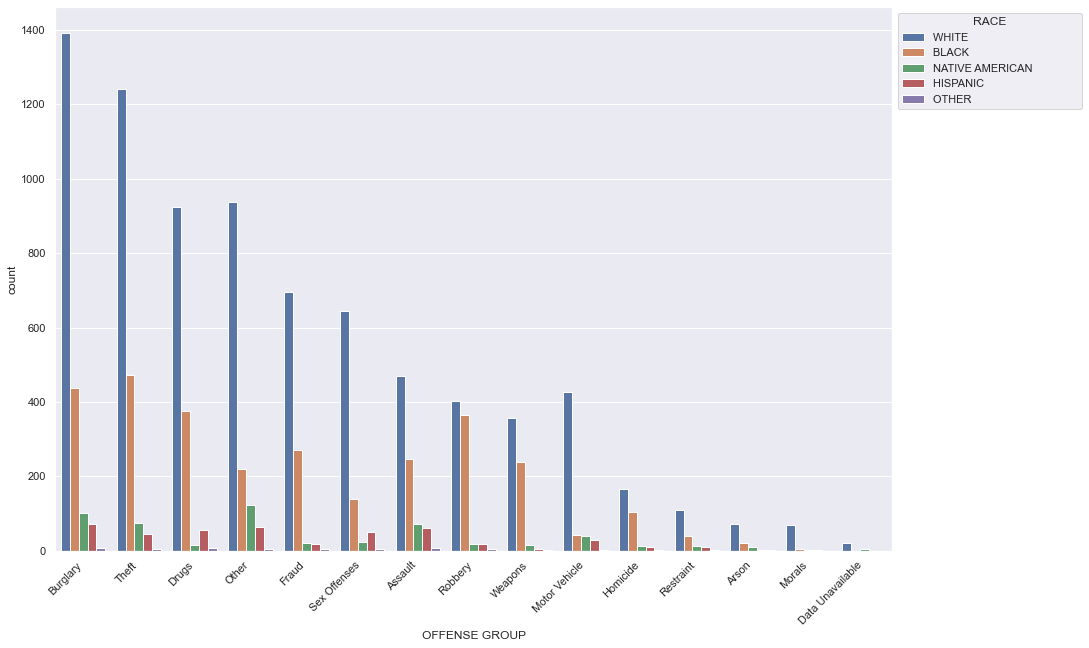

In [40]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE GROUP", hue="RACE DESC", ax=ax
                   , data=df1980, 
                    order=df1980["OFFENSE GROUP"].value_counts().iloc[:15].index,
                  hue_order=df1980["RACE DESC"].value_counts().iloc[:5].index)
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'RACE', bbox_to_anchor = (1, 1))

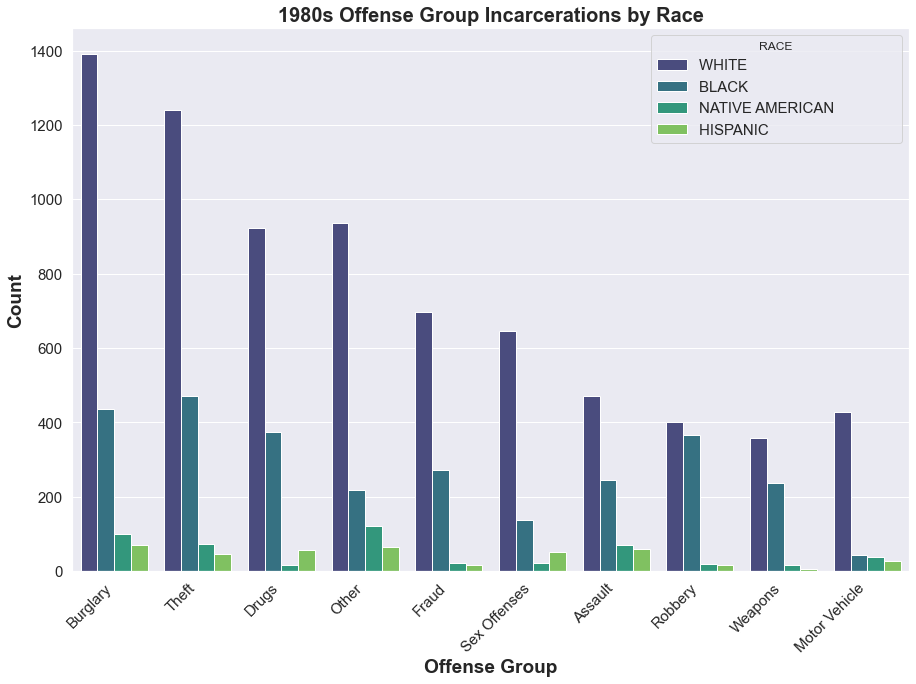

In [41]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE GROUP", hue="RACE DESC", ax=ax
                   , data=df1980, 
                   palette='viridis',
                    order=df1980["OFFENSE GROUP"].value_counts().iloc[:10].index,
                  hue_order=df1980["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Group',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('1980s Offense Group Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, bbox_to_anchor = (1, 1))

offense arrests

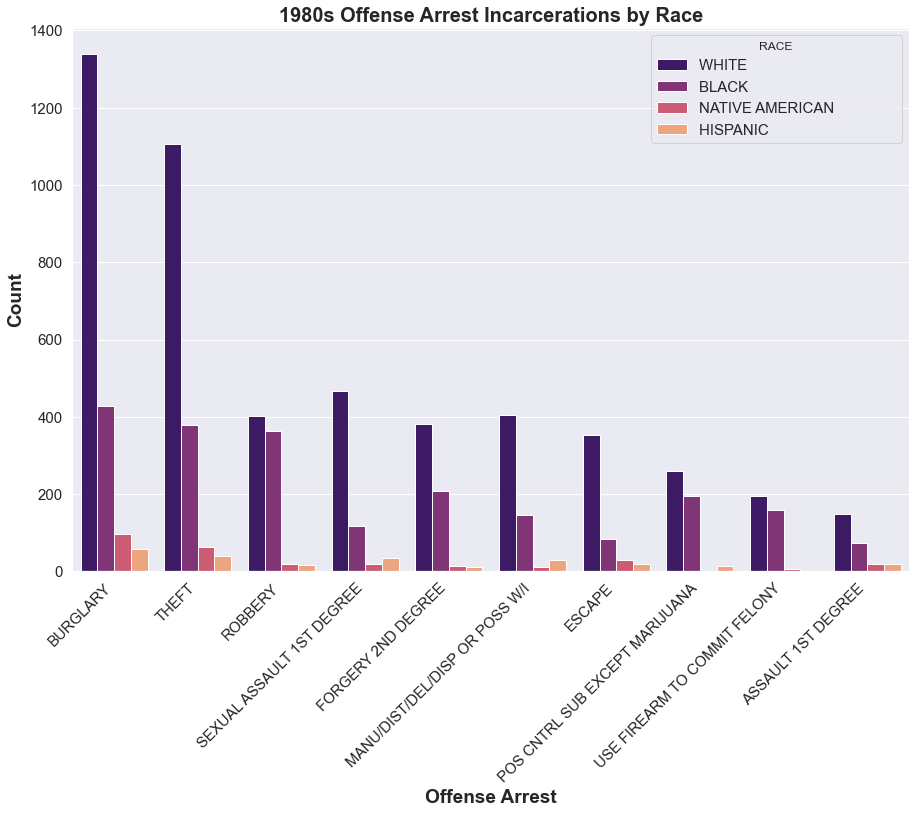

In [42]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE ARREST", hue="RACE DESC", ax=ax
                   , data=df1980, 
                   palette='magma',
                    order=df1980["OFFENSE ARREST"].value_counts().iloc[:10].index,
                  hue_order=df1980["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Arrest',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('1980s Offense Arrest Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, loc='upper right',bbox_to_anchor = (1, 1))

## 9. Exploring 1990s Value Counts, Value Averages, and Visualizations 

### 9.1 General Info

In [43]:
df1990.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22297 entries, 44 to 98241
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID NUMBER                     22297 non-null  int64  
 1   DATE OF BIRTH                 22297 non-null  object 
 2   RACE DESC                     22297 non-null  object 
 3   GENDER                        22297 non-null  object 
 4   FACILITY                      685 non-null    object 
 5   SENTENCE BEGIN DATE           22297 non-null  object 
 6   MIN TERM/YEAR                 22297 non-null  object 
 7   MAX TERM/YEAR                 22297 non-null  object 
 8   INST RELEASE DATE             21973 non-null  object 
 9   ACTIVE                        22297 non-null  int64  
 10  OFFENSE MINIMUM YEAR OR TERM  22297 non-null  float64
 11  OFFENSE MAXIMUM YEAR OR TERM  22297 non-null  float64
 12  OFFENSE ARREST DESC           22297 non-null  object 
 13  

### 9.2 Offense Group

Most offenses were drug charges in the 1990s

In [44]:
df1990.value_counts('OFFENSE GROUP', normalize=True).head(10)

OFFENSE GROUP
Drugs            0.196215
Theft            0.137014
Assault          0.100058
Other            0.095529
Burglary         0.094049
Motor Vehicle    0.089608
Sex Offenses     0.075391
Fraud            0.072790
Weapons          0.061398
Robbery          0.037628
dtype: float64

### 9.3 Offense Category

In [45]:
df1990.value_counts('OFFENSE CATEGORY', normalize=True).head(10)

OFFENSE CATEGORY
Other           0.288649
Property        0.236130
Person          0.203615
Drugs           0.196215
Sex Offenses    0.075391
dtype: float64

### 9.4 Felony/Misdemenor Code

In [46]:
df1990.value_counts('FELONY MSDMNR CODE', normalize=True).head(10)

FELONY MSDMNR CODE
FELONY                   0.330738
CLASS IV FELONY          0.278423
CLASS III FELONY         0.168693
CLASS II FELONY          0.064563
CLASS I MISDEMEANOR      0.064062
MISDEMEANOR              0.049265
CLASS II MISDEMEANOR     0.011975
CLASS III MISDEMEANOR    0.008605
CLASS W MISDEMEANOR      0.007740
CLASS IIIA FELONY        0.005099
dtype: float64

### 9.5 Offense Arrest

Most offenses were the manufacturing, distribution, delivery, dispensery, or possession with intent of selling drugs.

In [47]:
df1990.value_counts('OFFENSE ARREST', normalize=True).head(10)

OFFENSE ARREST
MANU/DIST/DEL/DISP OR POSS W/I    0.122573
BURGLARY                          0.090371
THEFT                             0.064986
POS CNTRL SUB EXCEPT MARIJUANA    0.062744
DRIVING UNDER REVOKED LICENSE     0.055254
FORGERY 2ND DEGREE                0.047450
ROBBERY                           0.037628
SEXUAL ASSAULT 1ST DEGREE         0.036911
SEXUAL ASSAULT ON A CHILD         0.029556
THEFT BY RECEIVING STOLEN PROP    0.025429
dtype: float64

### 9.6 Offense Type Code

In [48]:
df1990.value_counts('OFFENSE TYPE CODE', normalize=True)

OFFENSE TYPE CODE
*    0.875858
A    0.103601
B    0.015473
C    0.003588
D    0.001032
G    0.000179
E    0.000179
F    0.000090
dtype: float64

### 9.7 County Committed

In [49]:
df1990.value_counts('COUNTY COMMITTED', normalize=True).head(10)

COUNTY COMMITTED
DOUGLAS         0.366107
LANCASTER       0.120301
HALL            0.047771
SARPY           0.044541
MADISON         0.034090
SCOTTS BLUFF    0.031937
BUFFALO         0.024850
LINCOLN         0.023459
DAKOTA          0.018884
DODGE           0.018839
dtype: float64

### 9.8 Offense Minimum/Maximum Sentencing 

In [50]:
df1990['OFFENSE MINIMUM YEAR OR TERM'].mean()

2.045342422747455

In [51]:
df1990.value_counts('OFFENSE MINIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MINIMUM YEAR OR TERM
1.0     0.420595
0.0     0.245863
2.0     0.120599
3.0     0.074494
4.0     0.040409
5.0     0.031170
6.0     0.018926
10.0    0.017222
8.0     0.005337
15.0    0.004664
dtype: float64

In [52]:
df1990['OFFENSE MAXIMUM YEAR OR TERM'].mean()

4.279499484235547

In [53]:
df1990.value_counts('OFFENSE MAXIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MAXIMUM YEAR OR TERM
1.0     0.230390
5.0     0.164282
3.0     0.162892
2.0     0.136117
4.0     0.086379
0.0     0.071579
10.0    0.035386
6.0     0.029825
20.0    0.019330
8.0     0.013769
dtype: float64

### 9.9 Graphs

The amount of hispanics incarcerated each year increases, while black inmates remains largely around the same

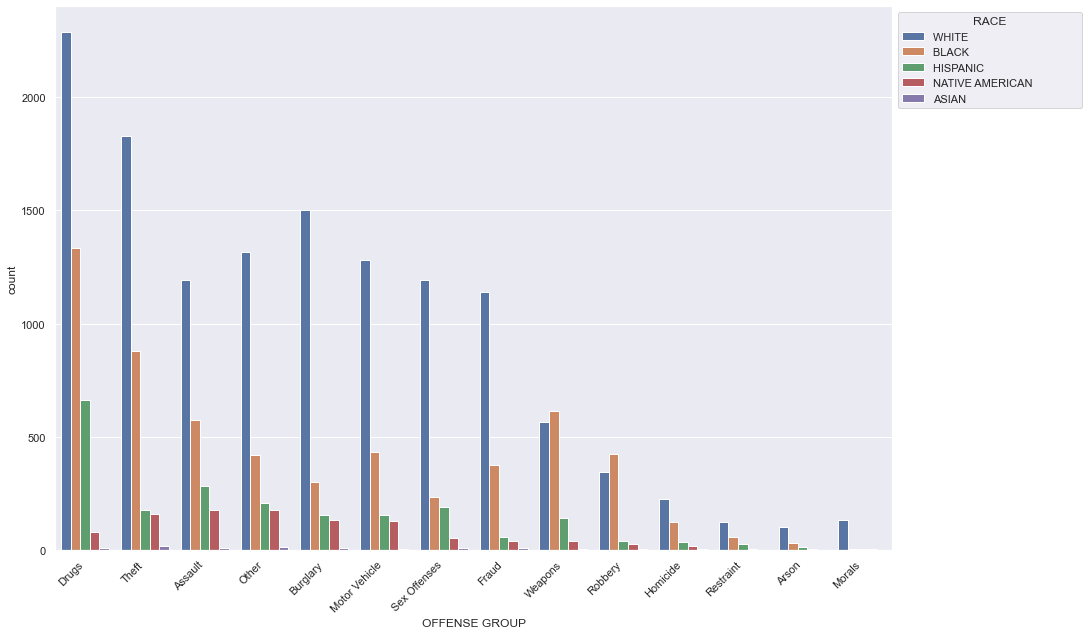

In [54]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE GROUP", hue="RACE DESC", ax=ax
                   , data=df1990, 
                   order=df1990["OFFENSE GROUP"].value_counts().iloc[:15].index,
                  hue_order=df1990["RACE DESC"].value_counts().iloc[:5].index)
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'RACE', bbox_to_anchor = (1, 1))

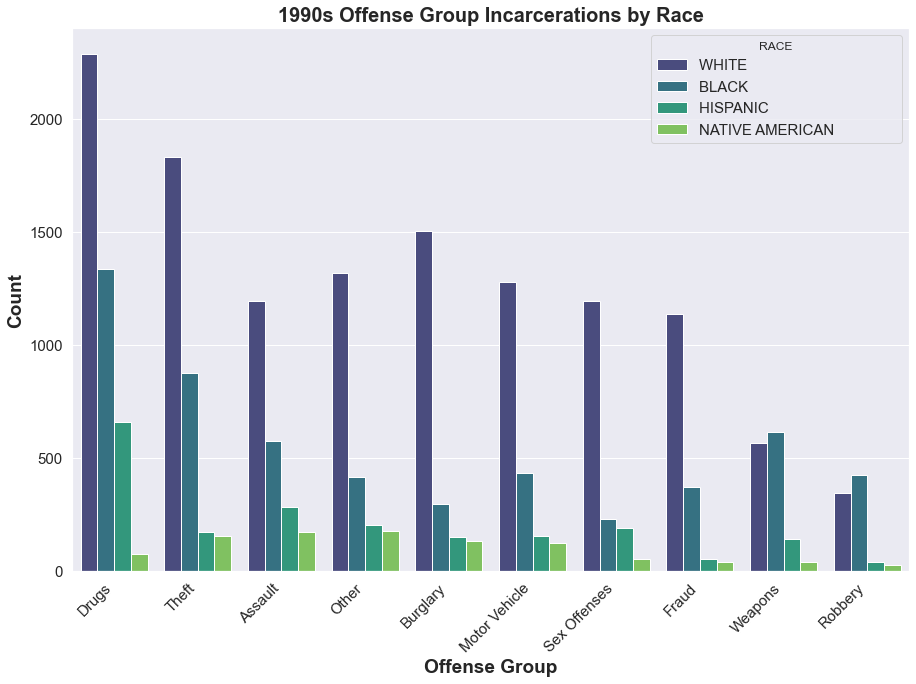

In [55]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE GROUP", hue="RACE DESC", ax=ax
                   , data=df1990, 
                   palette='viridis',
                    order=df1990["OFFENSE GROUP"].value_counts().iloc[:10].index,
                  hue_order=df1990["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Group',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('1990s Offense Group Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, bbox_to_anchor = (1, 1))

offense arrests

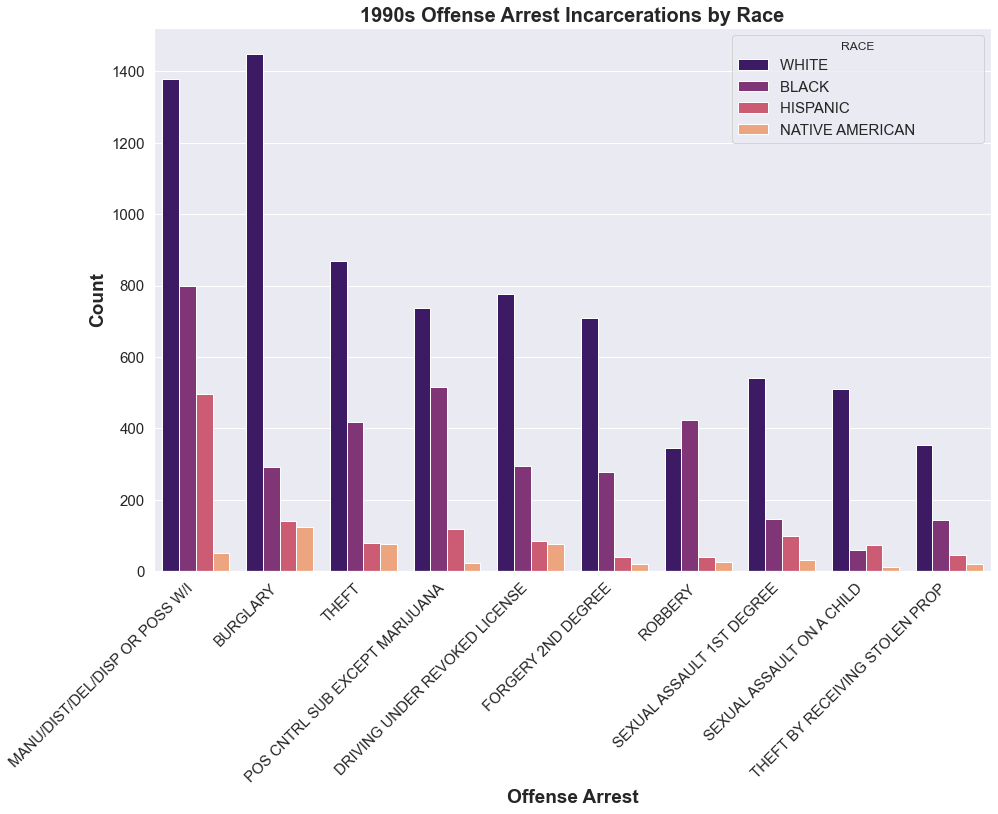

In [56]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE ARREST", hue="RACE DESC", ax=ax
                   , data=df1990, 
                   palette='magma',
                    order=df1990["OFFENSE ARREST"].value_counts().iloc[:10].index,
                  hue_order=df1990["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Arrest',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('1990s Offense Arrest Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, loc='upper right',bbox_to_anchor = (1, 1))

## 10. Exploring 2000s Value Counts, Value Averages, and Visualizations 

### 10.1 General Info

In [57]:
df2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34152 entries, 53 to 114673
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID NUMBER                     34152 non-null  int64  
 1   DATE OF BIRTH                 34152 non-null  object 
 2   RACE DESC                     34152 non-null  object 
 3   GENDER                        34152 non-null  object 
 4   FACILITY                      2746 non-null   object 
 5   SENTENCE BEGIN DATE           34152 non-null  object 
 6   MIN TERM/YEAR                 34152 non-null  object 
 7   MAX TERM/YEAR                 34152 non-null  object 
 8   INST RELEASE DATE             33204 non-null  object 
 9   ACTIVE                        34152 non-null  int64  
 10  OFFENSE MINIMUM YEAR OR TERM  34152 non-null  float64
 11  OFFENSE MAXIMUM YEAR OR TERM  34152 non-null  float64
 12  OFFENSE ARREST DESC           34152 non-null  object 
 13 

### 10.2 Offense Group

The percentage of offenses related to drugs rises in the 2000s

In [58]:
df2000.value_counts('OFFENSE GROUP', normalize=True).head(10)

OFFENSE GROUP
Drugs            0.216298
Theft            0.134516
Assault          0.126405
Motor Vehicle    0.105118
Other            0.080435
Burglary         0.077360
Fraud            0.072968
Sex Offenses     0.065823
Weapons          0.052266
Robbery          0.037655
dtype: float64

### 10.3 Offense Category

In [59]:
df2000.value_counts('OFFENSE CATEGORY', normalize=True).head(10)

OFFENSE CATEGORY
Other           0.282527
Person          0.220094
Drugs           0.216317
Property        0.215233
Sex Offenses    0.065829
dtype: float64

### 10.4 Felony/Misdemenor Code

In [60]:
df2000.value_counts('FELONY MSDMNR CODE', normalize=True).head(10)

FELONY MSDMNR CODE
CLASS IV FELONY          0.405247
CLASS III FELONY         0.253074
CLASS I MISDEMEANOR      0.115015
CLASS II FELONY          0.088662
CLASS IIIA FELONY        0.088194
CLASS II MISDEMEANOR     0.015812
CLASS W MISDEMEANOR      0.010892
CLASS III MISDEMEANOR    0.010775
CLASS IB FELONY          0.004421
CLASS ID FELONY          0.002518
dtype: float64

### 10.5 Offense Arrest

The most common offenses are possesion of a controlled substance and the "dealer" of a controlled substnace charge.

In [61]:
df2000.value_counts('OFFENSE ARREST', normalize=True).head(10)

OFFENSE ARREST
POS CNTRL SUB EXCEPT MARIJUANA    0.111365
MANU/DIST/DEL/DISP OR POSS W/I    0.091247
BURGLARY                          0.074058
THEFT BY UNLWFL TAKING OR DISP    0.046209
FORGERY 2ND DEGREE                0.044774
THEFT BY RECEIVING STOLEN PROP    0.042812
DRIVING WHILE INTOXICATED         0.039386
DRIVING UNDER REVOKED LICENSE     0.037922
ROBBERY                           0.037658
SEXUAL ASSAULT 1ST DEGREE         0.026414
dtype: float64

### 10.6 Offense Type Code

In [62]:
df2000.value_counts('OFFENSE TYPE CODE', normalize=True)

OFFENSE TYPE CODE
*    0.870989
A    0.102249
B    0.018681
C    0.004714
D    0.002255
E    0.000644
F    0.000264
G    0.000088
H    0.000059
S    0.000029
I    0.000029
dtype: float64

### 10.7 County Committed

In [63]:
df2000.value_counts('COUNTY COMMITTED', normalize=True).head(10)

COUNTY COMMITTED
DOUGLAS         0.330307
LANCASTER       0.141125
SARPY           0.056637
HALL            0.049873
MADISON         0.041028
SCOTTS BLUFF    0.026620
DODGE           0.024160
BUFFALO         0.021232
PLATTE          0.018918
ADAMS           0.016810
dtype: float64

### 10.8 Offense Minimum/Maximum Sentencing 

In [64]:
df2000['OFFENSE MINIMUM YEAR OR TERM'].mean()

2.2945361911454674

In [65]:
df2000.value_counts('OFFENSE MINIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MINIMUM YEAR OR TERM
1.0     0.482900
0.0     0.219811
2.0     0.088194
3.0     0.064418
4.0     0.036660
5.0     0.033292
10.0    0.018915
6.0     0.011947
8.0     0.008872
15.0    0.005651
dtype: float64

In [66]:
df2000['OFFENSE MAXIMUM YEAR OR TERM'].mean()

4.1050890138205665

In [67]:
df2000.value_counts('OFFENSE MAXIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MAXIMUM YEAR OR TERM
1.0     0.240279
3.0     0.155159
5.0     0.149713
2.0     0.145292
0.0     0.087491
4.0     0.084914
10.0    0.026528
6.0     0.025738
20.0    0.016632
8.0     0.016017
dtype: float64

### 10.9 Graphs

The percentage of black inmates steadily rises over the 2000s. Hispanic inmate numbers stay about the same.

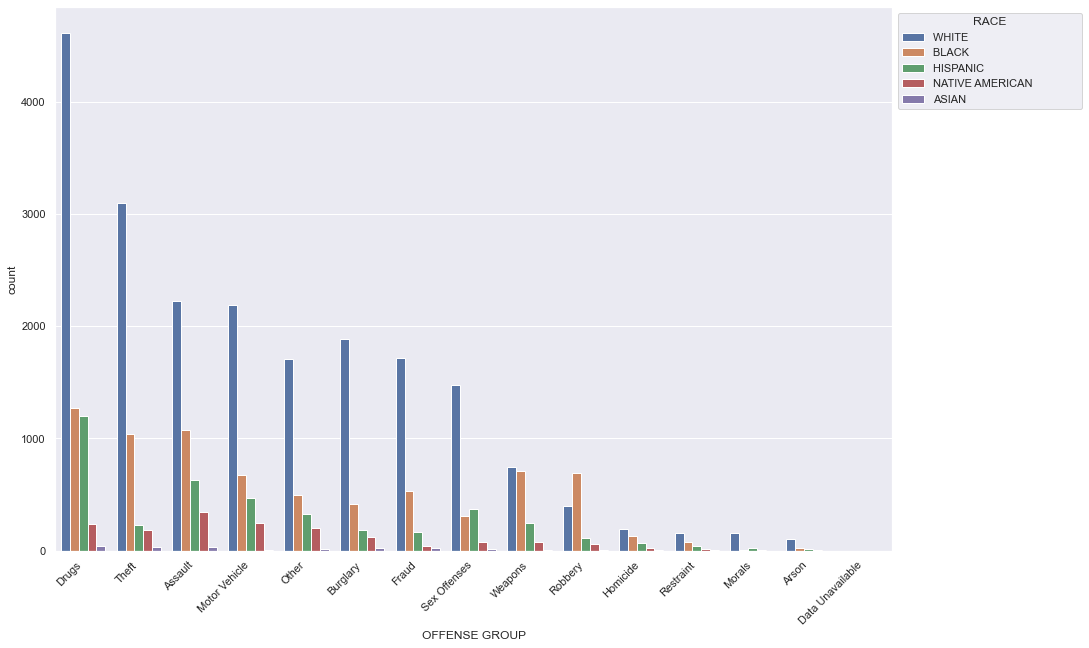

In [68]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE GROUP", hue="RACE DESC", ax=ax
                   , data=df2000,
                   order=df2000["OFFENSE GROUP"].value_counts().iloc[:15].index,
                  hue_order=df2000["RACE DESC"].value_counts().iloc[:5].index)
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'RACE', bbox_to_anchor = (1, 1))

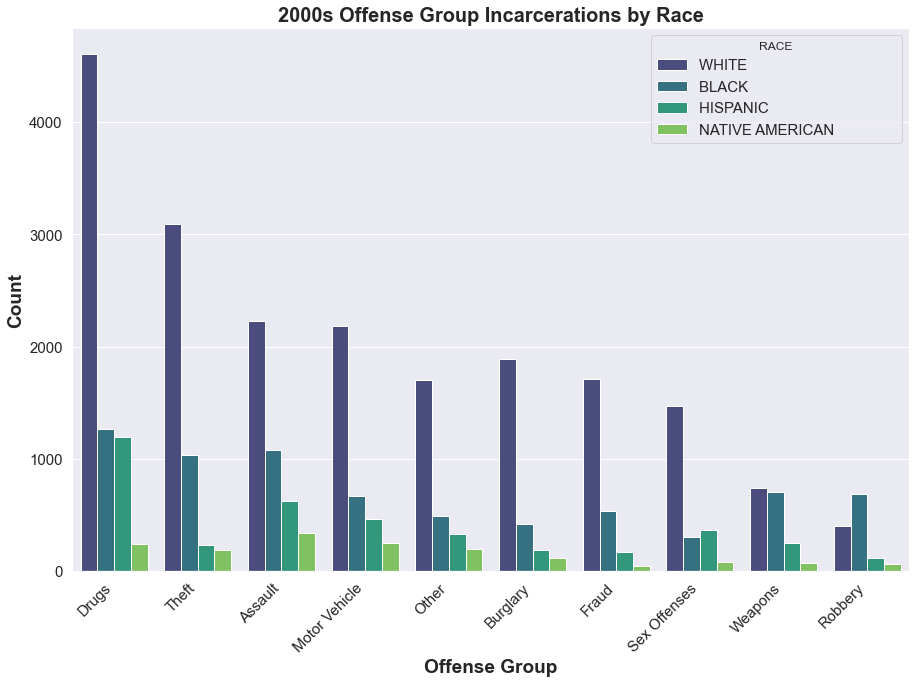

In [69]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE GROUP", hue="RACE DESC", ax=ax
                   , data=df2000, 
                   palette='viridis',
                    order=df2000["OFFENSE GROUP"].value_counts().iloc[:10].index,
                  hue_order=df2000["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Group',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('2000s Offense Group Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, bbox_to_anchor = (1, 1))

offense arrests

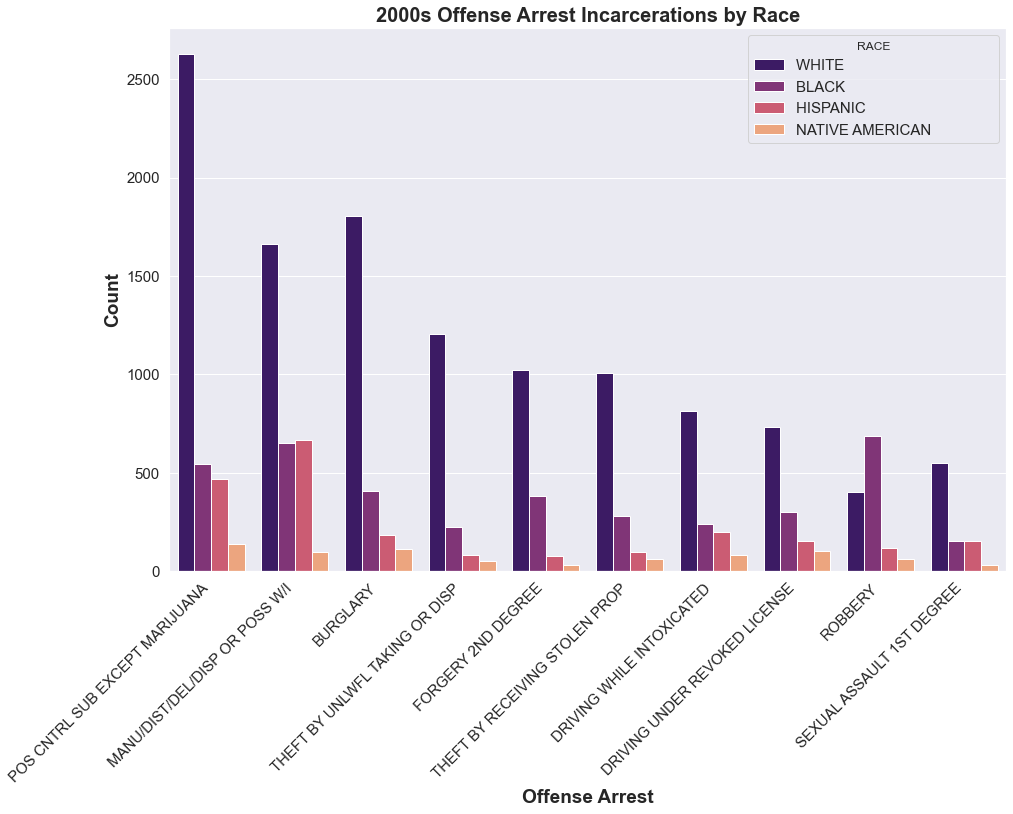

In [70]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE ARREST", hue="RACE DESC", ax=ax
                   , data=df2000, 
                   palette='magma',
                    order=df2000["OFFENSE ARREST"].value_counts().iloc[:10].index,
                  hue_order=df2000["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Arrest',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('2000s Offense Arrest Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, loc='upper right',bbox_to_anchor = (1, 1))

## 11. Exploring 2010s Value Counts, Value Averages, and Visualizations 

### 11.1 General Info

In [71]:
df2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42511 entries, 0 to 114764
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID NUMBER                     42511 non-null  int64  
 1   DATE OF BIRTH                 42511 non-null  object 
 2   RACE DESC                     42511 non-null  object 
 3   GENDER                        42511 non-null  object 
 4   FACILITY                      16516 non-null  object 
 5   SENTENCE BEGIN DATE           42511 non-null  object 
 6   MIN TERM/YEAR                 42511 non-null  object 
 7   MAX TERM/YEAR                 42511 non-null  object 
 8   INST RELEASE DATE             35638 non-null  object 
 9   ACTIVE                        42511 non-null  int64  
 10  OFFENSE MINIMUM YEAR OR TERM  42511 non-null  float64
 11  OFFENSE MAXIMUM YEAR OR TERM  42511 non-null  float64
 12  OFFENSE ARREST DESC           42511 non-null  object 
 13  

### 11.2 Offense Group

In [72]:
df2010.value_counts('OFFENSE GROUP', normalize=True).head(10)

OFFENSE GROUP
Drugs            0.208817
Assault          0.157042
Theft            0.132577
Motor Vehicle    0.105573
Other            0.080191
Weapons          0.078497
Sex Offenses     0.072499
Burglary         0.063678
Fraud            0.043706
Robbery          0.031733
dtype: float64

### 11.3 Offense Category

In [73]:
df2010.value_counts('OFFENSE CATEGORY', normalize=True).head(10)

OFFENSE CATEGORY
Other           0.283322
Person          0.236791
Drugs           0.208821
Property        0.198565
Sex Offenses    0.072501
dtype: float64

### 11.4 Felony/Misdemenor Code

In [74]:
df2010.value_counts('FELONY MSDMNR CODE', normalize=True).head(10)

FELONY MSDMNR CODE
CLASS IV FELONY          0.342382
CLASS III FELONY         0.170168
CLASS IIIA FELONY        0.130225
CLASS I MISDEMEANOR      0.108348
CLASS II FELONY          0.105455
CLASS IIA FELONY         0.058667
CLASS ID FELONY          0.025852
CLASS II MISDEMEANOR     0.017454
CLASS III MISDEMEANOR    0.010609
CLASS IC FELONY          0.009080
dtype: float64

### 11.5 Offense Arrest

In [75]:
df2010.value_counts('OFFENSE ARREST', normalize=True).head(10)

OFFENSE ARREST
POS CNTRL SUB EXCEPT MARIJUANA    0.111433
MANU/DIST/DEL/DISP OR POSS W/I    0.085721
BURGLARY                          0.060668
THEFT BY UNLWFL TAKING OR DISP    0.045919
DRIVING WHILE INTOXICATED         0.041778
THEFT BY RECEIVING STOLEN PROP    0.037756
POSS DEADLY WEAP BY FELON/FUG     0.033239
TERRORISTIC THREATS               0.032416
ROBBERY                           0.031734
THEFT BY SHOPLIFTING              0.031640
dtype: float64

### 11.6 Offense Type Code

In [76]:
df2010.value_counts('OFFENSE TYPE CODE', normalize=True)

OFFENSE TYPE CODE
*    0.867893
A    0.104679
B    0.020724
C    0.004822
D    0.001317
E    0.000329
F    0.000141
G    0.000071
N    0.000024
dtype: float64

### 11.7 County Committed

In [77]:
df2010.value_counts('COUNTY COMMITTED', normalize=True).head(10)

COUNTY COMMITTED
DOUGLAS         0.298831
LANCASTER       0.187302
HALL            0.064010
SARPY           0.053377
MADISON         0.037757
BUFFALO         0.029217
DODGE           0.027618
SCOTTS BLUFF    0.022019
ADAMS           0.021360
PLATTE          0.019878
dtype: float64

### 11.8 Offense Minimum/Maximum Sentencing 

In [78]:
df2010['OFFENSE MINIMUM YEAR OR TERM'].mean()

2.7527228246806708

In [79]:
df2010.value_counts('OFFENSE MINIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MINIMUM YEAR OR TERM
0.0     0.314624
1.0     0.313213
2.0     0.109407
3.0     0.081861
4.0     0.039966
5.0     0.039119
10.0    0.021994
6.0     0.016866
8.0     0.011291
20.0    0.009174
dtype: float64

In [80]:
df2010['OFFENSE MAXIMUM YEAR OR TERM'].mean()

4.335277928065677

In [81]:
df2010.value_counts('OFFENSE MAXIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MAXIMUM YEAR OR TERM
0.0     0.208370
1.0     0.203406
2.0     0.133189
3.0     0.112747
5.0     0.102962
4.0     0.063278
10.0    0.031145
6.0     0.031098
8.0     0.021971
20.0    0.018889
dtype: float64

### 11.9 Graphs

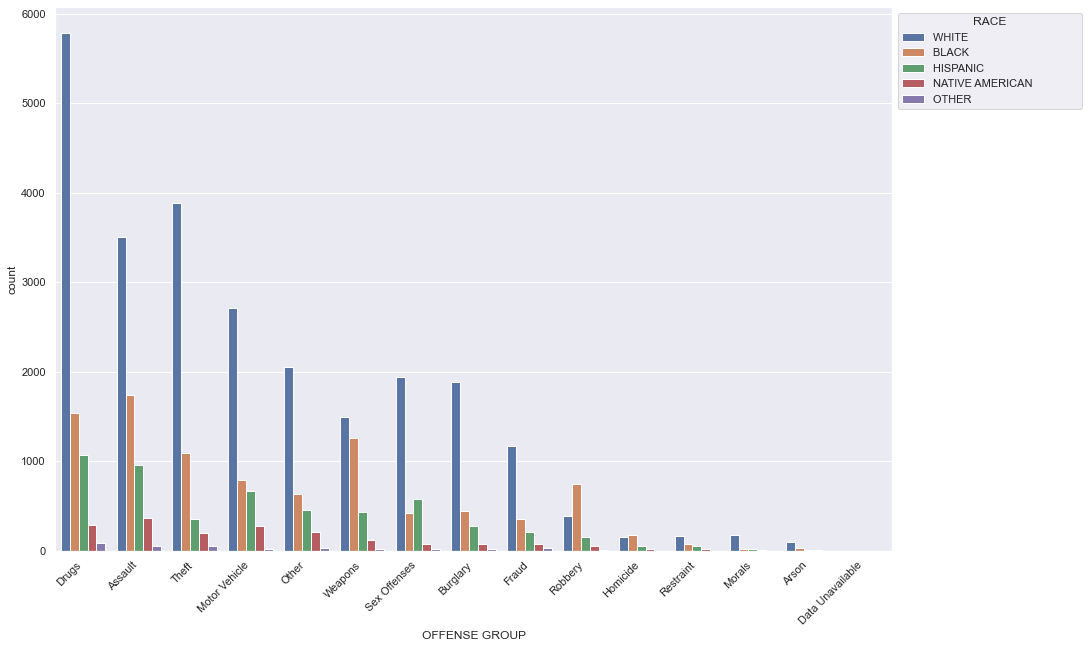

In [82]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE GROUP", hue="RACE DESC", ax=ax
                   , data=df2010,  
                   order=df2010["OFFENSE GROUP"].value_counts().iloc[:15].index,
                  hue_order=df2010["RACE DESC"].value_counts().iloc[:5].index)
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'RACE', bbox_to_anchor = (1, 1))

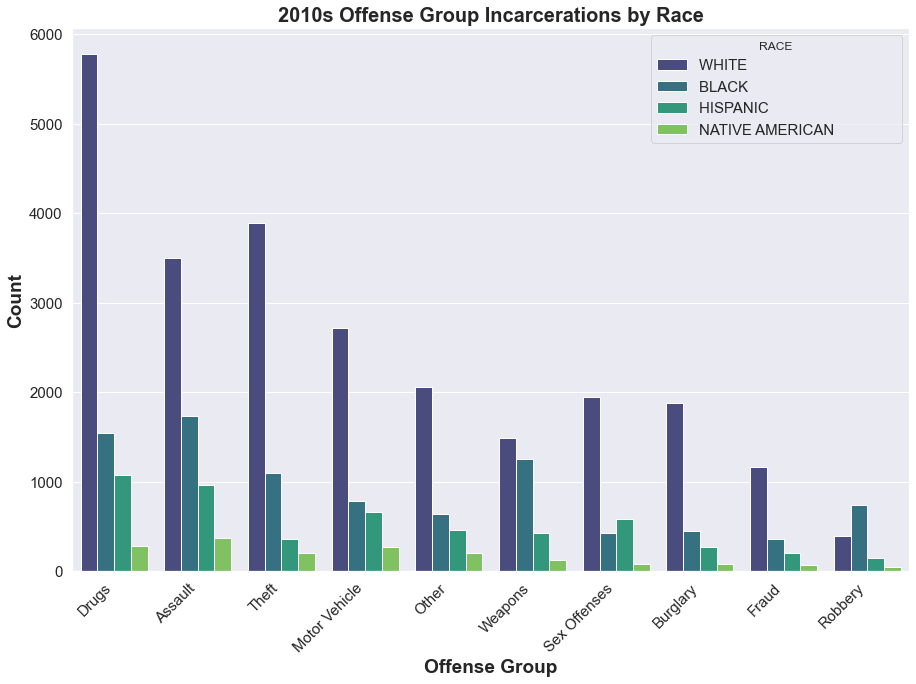

In [83]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE GROUP", hue="RACE DESC", ax=ax
                   , data=df2010, 
                   palette='viridis',
                    order=df2010["OFFENSE GROUP"].value_counts().iloc[:10].index,
                  hue_order=df2010["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Group',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('2010s Offense Group Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, bbox_to_anchor = (1, 1))

offense arrests

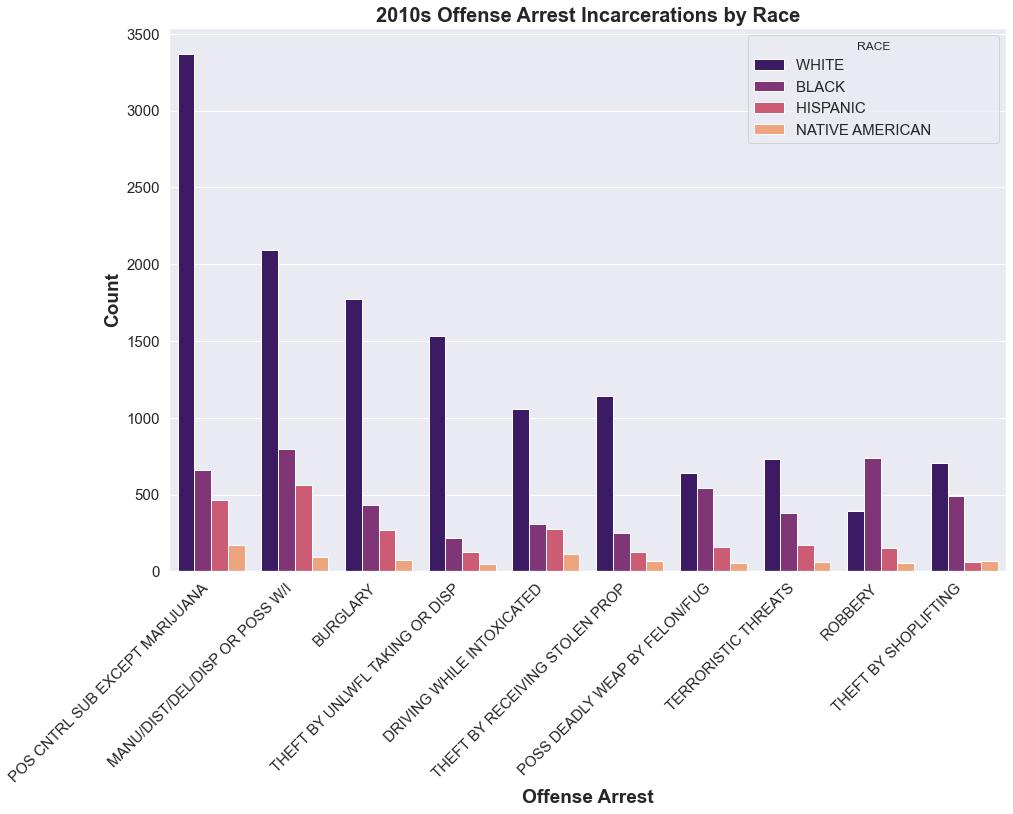

In [84]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE ARREST", hue="RACE DESC", ax=ax
                   , data=df2010, 
                   palette='magma',
                    order=df2010["OFFENSE ARREST"].value_counts().iloc[:10].index,
                  hue_order=df2010["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Arrest',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('2010s Offense Arrest Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, loc='upper right',bbox_to_anchor = (1, 1))

## 12. Exploring Active Inmate Value Counts, Value Averages, and Visualizations 

### 12.1 General Info

In [85]:
dfActive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17599 entries, 23 to 113609
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID NUMBER                     17599 non-null  int64  
 1   DATE OF BIRTH                 17599 non-null  object 
 2   RACE DESC                     17599 non-null  object 
 3   GENDER                        17599 non-null  object 
 4   FACILITY                      17513 non-null  object 
 5   SENTENCE BEGIN DATE           17599 non-null  object 
 6   MIN TERM/YEAR                 17599 non-null  object 
 7   MAX TERM/YEAR                 17599 non-null  object 
 8   INST RELEASE DATE             7320 non-null   object 
 9   ACTIVE                        17599 non-null  int64  
 10  OFFENSE MINIMUM YEAR OR TERM  17599 non-null  float64
 11  OFFENSE MAXIMUM YEAR OR TERM  17599 non-null  float64
 12  OFFENSE ARREST DESC           17599 non-null  object 
 13 

### 12.2 Offense Group

In [86]:
dfActive.value_counts('OFFENSE GROUP', normalize=True).head(10)

OFFENSE GROUP
Assault          0.174158
Drugs            0.160350
Weapons          0.137110
Sex Offenses     0.110177
Theft            0.089210
Motor Vehicle    0.067049
Other            0.066140
Burglary         0.053753
Robbery          0.050116
Homicide         0.044093
dtype: float64

### 12.3 Offense Category

In [87]:
dfActive.value_counts('OFFENSE CATEGORY', normalize=True).head(10)

OFFENSE CATEGORY
Person          0.342804
Other           0.241661
Drugs           0.160350
Property        0.145008
Sex Offenses    0.110177
dtype: float64

### 12.4 Felony/Misdemenor Code

In [88]:
dfActive.value_counts('FELONY MSDMNR CODE', normalize=True).head(10)

FELONY MSDMNR CODE
CLASS IV FELONY         0.216202
CLASS II FELONY         0.177317
CLASS IIIA FELONY       0.145935
CLASS III FELONY        0.120125
CLASS IIA FELONY        0.111427
CLASS I MISDEMEANOR     0.079477
CLASS ID FELONY         0.047015
CLASS IB FELONY         0.030301
CLASS IC FELONY         0.021489
CLASS II MISDEMEANOR    0.012848
dtype: float64

### 12.5 Offense Arrest

In [89]:
dfActive.value_counts('OFFENSE ARREST', normalize=True).head(10)

OFFENSE ARREST
POS CNTRL SUB EXCEPT MARIJUANA    0.086709
MANU/DIST/DEL/DISP OR POSS W/I    0.067731
BURGLARY                          0.051139
ROBBERY                           0.050116
POSS DEADLY WEAP BY FELON/FUG     0.044207
SEXUAL ASSAULT 1ST DEGREE         0.039945
USE DEADLY WEAP TO COMMIT FEL     0.035229
THEFT BY UNLWFL TAKING OR DISP    0.032956
TERRORISTIC THREATS               0.031706
SEXUAL ASSULT OF CHILD 1ST DEG    0.030684
dtype: float64

### 12.6 Offense Type Code

In [90]:
dfActive.value_counts('OFFENSE TYPE CODE', normalize=True)

OFFENSE TYPE CODE
*    0.819137
A    0.130291
B    0.033866
C    0.010057
D    0.004546
E    0.001080
F    0.000625
G    0.000341
H    0.000057
dtype: float64

### 12.7 County Committed

In [91]:
dfActive.value_counts('COUNTY COMMITTED', normalize=True).head(10)

COUNTY COMMITTED
DOUGLAS         0.321666
LANCASTER       0.204330
HALL            0.057219
SARPY           0.045116
MADISON         0.037332
BUFFALO         0.036934
SCOTTS BLUFF    0.028354
GAGE            0.018353
PLATTE          0.018012
DODGE           0.016649
dtype: float64

### 12.8 Offense Minimum/Maximum Sentencing 

In [92]:
dfActive['OFFENSE MINIMUM YEAR OR TERM'].mean()

6.679413603045628

In [93]:
dfActive.value_counts('OFFENSE MINIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MINIMUM YEAR OR TERM
0.0     0.298767
1.0     0.108245
2.0     0.095460
3.0     0.091255
10.0    0.067049
5.0     0.063981
4.0     0.045798
20.0    0.032900
6.0     0.030627
15.0    0.024604
dtype: float64

In [94]:
dfActive['OFFENSE MAXIMUM YEAR OR TERM'].mean()

9.73515540655719

In [95]:
dfActive.value_counts('OFFENSE MAXIMUM YEAR OR TERM', normalize=True).head(10)

OFFENSE MAXIMUM YEAR OR TERM
0.0     0.194784
2.0     0.114325
1.0     0.093130
3.0     0.079550
5.0     0.075913
20.0    0.066992
10.0    0.064492
6.0     0.034036
8.0     0.033070
4.0     0.031877
dtype: float64

### 12.9 Graphs

The percentage of black inmates steadily rises over the Actives. Hispanic inmate numbers stay about the same.

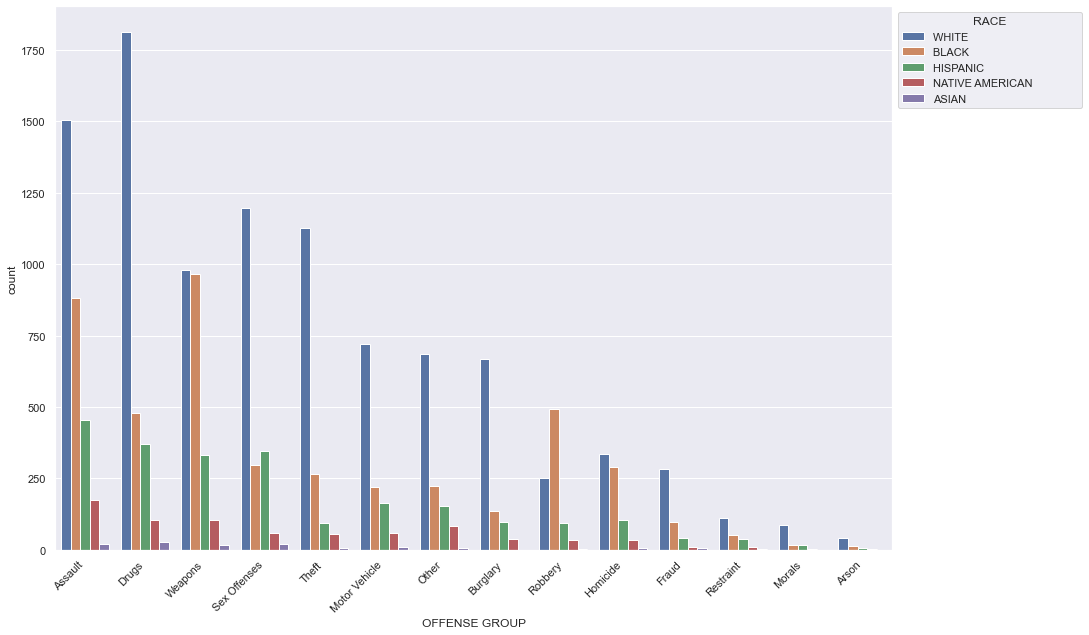

In [96]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE GROUP", hue="RACE DESC", ax=ax
                   , data=dfActive,  
                   order=dfActive["OFFENSE GROUP"].value_counts().iloc[:15].index,
                  hue_order=dfActive["RACE DESC"].value_counts().iloc[:5].index)
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'RACE', bbox_to_anchor = (1, 1))

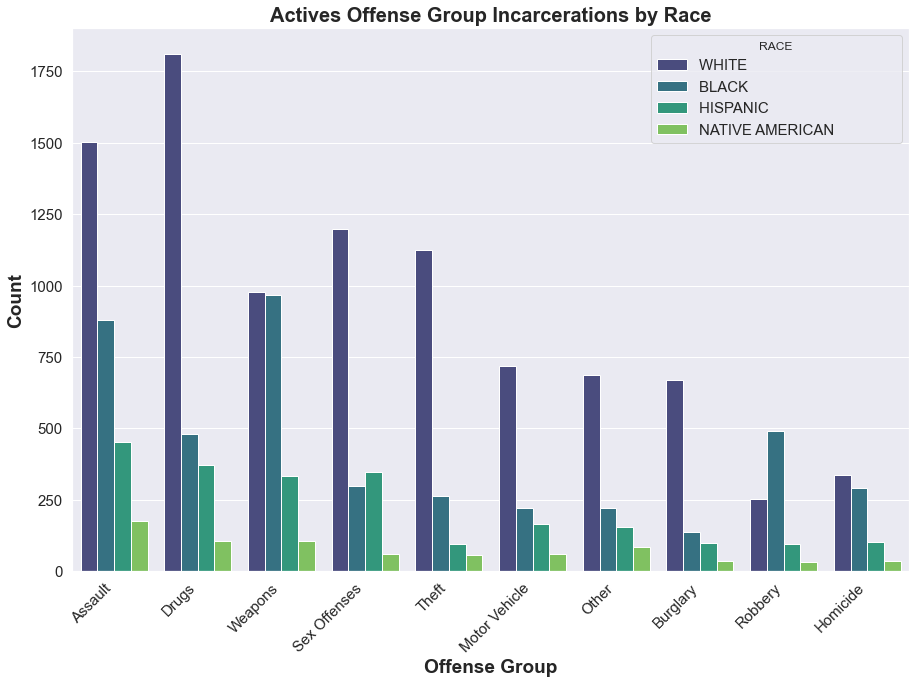

In [97]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE GROUP", hue="RACE DESC", ax=ax
                   , data=dfActive, 
                   palette='viridis',
                    order=dfActive["OFFENSE GROUP"].value_counts().iloc[:10].index,
                  hue_order=dfActive["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Group',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Actives Offense Group Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, bbox_to_anchor = (1, 1))

offense arrests

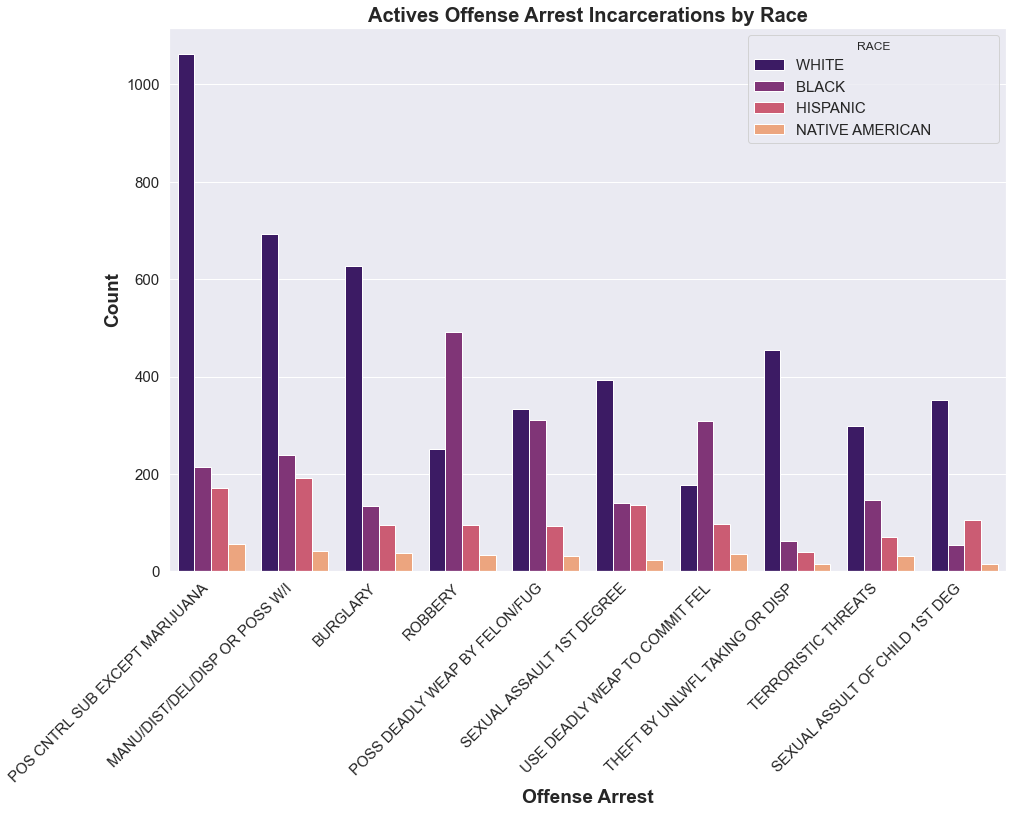

In [98]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="OFFENSE ARREST", hue="RACE DESC", ax=ax
                   , data=dfActive, 
                   palette='magma',
                    order=dfActive["OFFENSE ARREST"].value_counts().iloc[:10].index,
                  hue_order=dfActive["RACE DESC"].value_counts().iloc[:4].index)

plt.xlabel('Offense Arrest',fontsize=19, fontweight='bold')
plt.ylabel('Count',fontsize=19, fontweight='bold')
plt.xticks(rotation = 45, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Actives Offense Arrest Incarcerations by Race', fontweight='bold', fontsize=20)
plt.legend(title = 'RACE', fontsize=15, loc='upper right',bbox_to_anchor = (1, 1))

## 13. All Values Compared

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114765 entries, 0 to 114764
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID NUMBER                     114765 non-null  int64  
 1   DATE OF BIRTH                 114765 non-null  object 
 2   RACE DESC                     114765 non-null  object 
 3   GENDER                        114765 non-null  object 
 4   FACILITY                      24703 non-null   object 
 5   SENTENCE BEGIN DATE           114765 non-null  object 
 6   MIN TERM/YEAR                 114765 non-null  object 
 7   MAX TERM/YEAR                 114765 non-null  object 
 8   INST RELEASE DATE             103618 non-null  object 
 9   ACTIVE                        114765 non-null  int64  
 10  OFFENSE MINIMUM YEAR OR TERM  114765 non-null  float64
 11  OFFENSE MAXIMUM YEAR OR TERM  114765 non-null  float64
 12  OFFENSE ARREST DESC           114765 non-nul

### 13.1 Offense Group Percentages by Decade

In [100]:
print('1980s:')
print(df1980.value_counts('OFFENSE GROUP', normalize=True))
print()
print('1990s:')
print(df1990.value_counts('OFFENSE GROUP', normalize=True))
print()
print('2000s:')
print(df2000.value_counts('OFFENSE GROUP', normalize=True))
print()
print('2010s:')
print(df2010.value_counts('OFFENSE GROUP', normalize=True))
print()
print('Active:')
print(dfActive.value_counts('OFFENSE GROUP', normalize=True))

1980s:
OFFENSE GROUP
Burglary            0.168132
Theft               0.153814
Drugs               0.115549
Other               0.112786
Fraud               0.084820
Sex Offenses        0.072176
Assault             0.071506
Robbery             0.067822
Weapons             0.051830
Motor Vehicle       0.045299
Homicide            0.024449
Restraint           0.014402
Arson               0.008792
Morals              0.006447
Data Unavailable    0.002177
dtype: float64

1990s:
OFFENSE GROUP
Drugs            0.196215
Theft            0.137014
Assault          0.100058
Other            0.095529
Burglary         0.094049
Motor Vehicle    0.089608
Sex Offenses     0.075391
Fraud            0.072790
Weapons          0.061398
Robbery          0.037628
Homicide         0.017805
Restraint        0.009463
Arson            0.006593
Morals           0.006458
dtype: float64

2000s:
OFFENSE GROUP
Drugs               0.216298
Theft               0.134516
Assault             0.126405
Motor Vehicle      

### 13.2 Offense Arrest Percentages by Decade

In [101]:
print('1980s:')
print(df1980.value_counts('OFFENSE ARREST', normalize=True).head(10))
print()
print('1990s:')
print(df1990.value_counts('OFFENSE ARREST', normalize=True).head(10))
print()
print('2000s:')
print(df2000.value_counts('OFFENSE ARREST', normalize=True).head(10))
print()
print('2010s:')
print(df2010.value_counts('OFFENSE ARREST', normalize=True).head(10))
print()
print('Active:')
print(dfActive.value_counts('OFFENSE ARREST', normalize=True).head(10))

1980s:
OFFENSE ARREST
BURGLARY                          0.161954
THEFT                             0.133675
ROBBERY                           0.067802
SEXUAL ASSAULT 1ST DEGREE         0.053873
FORGERY 2ND DEGREE                0.051859
MANU/DIST/DEL/DISP OR POSS W/I    0.050097
ESCAPE                            0.040866
POS CNTRL SUB EXCEPT MARIJUANA    0.039523
USE FIREARM TO COMMIT FELONY      0.030209
ASSAULT 1ST DEGREE                0.021901
dtype: float64

1990s:
OFFENSE ARREST
MANU/DIST/DEL/DISP OR POSS W/I    0.122573
BURGLARY                          0.090371
THEFT                             0.064986
POS CNTRL SUB EXCEPT MARIJUANA    0.062744
DRIVING UNDER REVOKED LICENSE     0.055254
FORGERY 2ND DEGREE                0.047450
ROBBERY                           0.037628
SEXUAL ASSAULT 1ST DEGREE         0.036911
SEXUAL ASSAULT ON A CHILD         0.029556
THEFT BY RECEIVING STOLEN PROP    0.025429
dtype: float64

2000s:
OFFENSE ARREST
POS CNTRL SUB EXCEPT MARIJUANA    0.111365

### 13.3 Offense MIN/MAX Sentencing Averages by Decade


In [102]:
print('1980s:')
print(df1980['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1980['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print()
print('1990s:')
print(df1990['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1990['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print()
print('2000s:')
print(df2000['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2000['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print()
print('2010s:')
print(df2010['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2010['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print()
print('Active:')
print(dfActive['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(dfActive['OFFENSE MAXIMUM YEAR OR TERM'].mean())

1980s:
2.0630494850540066
4.501883948756594

1990s:
2.045342422747455
4.279499484235547

2000s:
2.2945361911454674
4.1050890138205665

2010s:
2.7527228246806708
4.335277928065677

Active:
6.679413603045628
9.73515540655719


### 13.4 Offense Racial Averages by Decade

In [103]:
print('1980s:')
print(df1980.value_counts('RACE DESC', normalize=True))
print()
print('1990s:')
print(df1990.value_counts('RACE DESC', normalize=True))
print()
print('2000s:')
print(df2000.value_counts('RACE DESC', normalize=True))
print()
print('2010s:')
print(df2010.value_counts('RACE DESC', normalize=True))
print()
print('Active:')
print(dfActive.value_counts('RACE DESC', normalize=True))

1980s:
RACE DESC
WHITE                             0.663987
BLACK                             0.249100
NATIVE AMERICAN                   0.045382
HISPANIC                          0.036925
OTHER                             0.004438
ASIAN                             0.000084
                                  0.000084
dtype: float64

1990s:
RACE DESC
WHITE                             0.593353
BLACK                             0.259811
HISPANIC                          0.095932
NATIVE AMERICAN                   0.046419
ASIAN                             0.003767
OTHER                             0.000718
dtype: float64

2000s:
RACE DESC
WHITE                             0.604972
BLACK                             0.218142
HISPANIC                          0.120169
NATIVE AMERICAN                   0.048313
ASIAN                             0.006295
OTHER                             0.001903
                                  0.000117
PACIFIC ISLANDER                  0.000088
dtype: float64

## 14. Deeper Dive into Terroristic Threats Offense

This offense became much more common in the 2000s and 2010s and needed to be examined further

### 14.1 Broad look at Terroristic Threats values

In [104]:
df_terror = pd.DataFrame(df[df['OFFENSE ARREST'].str.contains("TERRORISTIC THREATS", na=False)])

In [105]:
df_terror['OFFENSE MAXIMUM YEAR OR TERM'].value_counts().head(10)

3.0     611
1.0     577
2.0     459
0.0     418
5.0     398
4.0     161
10.0      9
20.0      5
12.0      3
30.0      3
Name: OFFENSE MAXIMUM YEAR OR TERM, dtype: int64

In [106]:
df_terror.value_counts('RACE DESC', normalize=True)

RACE DESC
WHITE                             0.547134
BLACK                             0.253017
HISPANIC                          0.127074
NATIVE AMERICAN                   0.055807
ASIAN                             0.009427
OTHER                             0.006787
PACIFIC ISLANDER                  0.000377
                                  0.000377
dtype: float64

### 14.2 Counting Offense Numbers and Racial Makeup by Decade

In [107]:
#split up on terror for each decade

df1980_terror = pd.DataFrame(df1980[df1980['OFFENSE ARREST'].str.contains("TERRORISTIC THREATS", na=False)])
df1990_terror = pd.DataFrame(df1990[df1990['OFFENSE ARREST'].str.contains("TERRORISTIC THREATS", na=False)])
df2000_terror = pd.DataFrame(df2000[df2000['OFFENSE ARREST'].str.contains("TERRORISTIC THREATS", na=False)])
df2010_terror = pd.DataFrame(df2010[df2010['OFFENSE ARREST'].str.contains("TERRORISTIC THREATS", na=False)])
dfActive_terror = pd.DataFrame(dfActive[dfActive['OFFENSE ARREST'].str.contains("TERRORISTIC THREATS", na=False)])

In [108]:
#Example for finding stats on specific things 
print('1980s Terror offenses each year:')
print(df1980_terror['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df1980_terror.value_counts('RACE DESC', normalize=True))
print()

print('1990ss Terror offenses each year:')
print(df1990_terror['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df1990_terror.value_counts('RACE DESC', normalize=True))
print()

print('2000s Terror offenses each year:')
print(df2000_terror['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df2000_terror.value_counts('RACE DESC', normalize=True))
print()

print("2010s Terror offenses each year:")
print(df2010_terror['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df2010_terror.value_counts('RACE DESC', normalize=True))
print()

print("Active Terror offenses each year:")
print(dfActive_terror['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(dfActive_terror.value_counts('RACE DESC', normalize=True))

1980s Terror offenses each year:
1989    8
1980    5
1988    5
1982    4
1981    3
1987    2
1983    1
1986    1
Name: SENTENCE BEGIN YEAR, dtype: int64
RACE DESC
WHITE                             0.724138
BLACK                             0.172414
HISPANIC                          0.068966
NATIVE AMERICAN                   0.034483
dtype: float64

1990ss Terror offenses each year:
1998    51
1997    47
1996    40
1999    39
1994    28
1995    26
1993    26
1992    20
1990    19
1991    11
Name: SENTENCE BEGIN YEAR, dtype: int64
RACE DESC
WHITE                             0.622150
BLACK                             0.182410
HISPANIC                          0.123779
NATIVE AMERICAN                   0.058632
ASIAN                             0.013029
dtype: float64

2000s Terror offenses each year:
2009    104
2008     98
2006     89
2005     86
2007     85
2003     84
2004     81
2002     73
2001     57
2000     39
Name: SENTENCE BEGIN YEAR, dtype: int64
RACE DESC
WHITE                

### 14.3 1980s Min/Max Sentencing by Race

In [109]:
df1980_terror_black = pd.DataFrame(df1980_terror[df1980_terror['RACE DESC'].str.contains("BLACK", na=False)])
df1980_terror_white = pd.DataFrame(df1980_terror[df1980_terror['RACE DESC'].str.contains("WHITE", na=False)])
df1980_terror_hisp = pd.DataFrame(df1980_terror[df1980_terror['RACE DESC'].str.contains("HISPANIC", na=False)])
print('1980s Terroristic Threats Min/Max Sentencing by Race')
print('Black:')
print(df1980_terror_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1980_terror_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df1980_terror_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1980_terror_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df1980_terror_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1980_terror_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

1980s Terroristic Threats Min/Max Sentencing by Race
Black:
1.0
2.6
White:
0.6666666666666666
2.5714285714285716
Hispanic:
0.0
1.0


### 14.4 1990s Min/Max Sentencing by Race

In [110]:
df1990_terror_black = pd.DataFrame(df1990_terror[df1990_terror['RACE DESC'].str.contains("BLACK", na=False)])
df1990_terror_white = pd.DataFrame(df1990_terror[df1990_terror['RACE DESC'].str.contains("WHITE", na=False)])
df1990_terror_hisp = pd.DataFrame(df1990_terror[df1990_terror['RACE DESC'].str.contains("HISPANIC", na=False)])
print('1990s Terroristic Threats Min/Max Sentencing by Race')
print('Black:')
print(df1990_terror_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1990_terror_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df1990_terror_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1990_terror_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df1990_terror_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1990_terror_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

1990s Terroristic Threats Min/Max Sentencing by Race
Black:
1.1785714285714286
2.8035714285714284
White:
1.1151832460732984
3.1780104712041886
Hispanic:
0.8947368421052632
2.473684210526316


### 14.5 2000s Min/Max Sentencing by Race

In [111]:
df2000_terror_black = pd.DataFrame(df2000_terror[df2000_terror['RACE DESC'].str.contains("BLACK", na=False)])
df2000_terror_white = pd.DataFrame(df2000_terror[df2000_terror['RACE DESC'].str.contains("WHITE", na=False)])
df2000_terror_hisp = pd.DataFrame(df2000_terror[df2000_terror['RACE DESC'].str.contains("HISPANIC", na=False)])
print('2000s Terroristic Threats Min/Max Sentencing by Race')
print('Black:')
print(df2000_terror_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2000_terror_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df2000_terror_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2000_terror_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df2000_terror_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2000_terror_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

2000s Terroristic Threats Min/Max Sentencing by Race
Black:
1.064676616915423
2.7213930348258706
White:
0.8483412322274881
2.786729857819905
Hispanic:
0.8403361344537815
2.3949579831932772


### 14.6 2010s Min/Max Sentencing by Race

In [112]:
df2010_terror_black = pd.DataFrame(df2010_terror[df2010_terror['RACE DESC'].str.contains("BLACK", na=False)])
df2010_terror_white = pd.DataFrame(df2010_terror[df2010_terror['RACE DESC'].str.contains("WHITE", na=False)])
df2010_terror_hisp = pd.DataFrame(df2010_terror[df2010_terror['RACE DESC'].str.contains("HISPANIC", na=False)])
print('2010s Terroristic Threats Min/Max Sentencing by Race')
print('Black:')
print(df2010_terror_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2010_terror_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df2010_terror_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2010_terror_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df2010_terror_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2010_terror_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

2010s Terroristic Threats Min/Max Sentencing by Race
Black:
1.20844327176781
2.3482849604221636
White:
0.9809264305177112
2.239782016348774
Hispanic:
0.9053254437869822
1.7928994082840237


## 15. Deeper Dive into Drug Possession Offense

### 15.1 Broad Look

In [113]:
df_pos = pd.DataFrame(df[df['OFFENSE ARREST'].str.contains("POS CNTRL SUB EXCEPT MARIJUANA", na=False)])

In [114]:
df_pos['OFFENSE MAXIMUM YEAR OR TERM'].value_counts().head(10)

1.0     3422
2.0     2424
0.0     1757
3.0     1544
5.0     1029
4.0      588
10.0      43
8.0       29
6.0       28
15.0      28
Name: OFFENSE MAXIMUM YEAR OR TERM, dtype: int64

In [115]:
df_pos.value_counts('RACE DESC', normalize=True)

RACE DESC
WHITE                             0.673415
BLACK                             0.181760
HISPANIC                          0.101870
NATIVE AMERICAN                   0.032558
OTHER                             0.005290
ASIAN                             0.004104
                                  0.000821
PACIFIC ISLANDER                  0.000182
dtype: float64

### 15.2 Counting Offense Numbers and Racial Makeup by Decade

In [116]:
#split up on pos for each decade

df1980_pos = pd.DataFrame(df1980[df1980['OFFENSE ARREST'].str.contains("POS CNTRL SUB EXCEPT MARIJUANA", na=False)])
df1990_pos = pd.DataFrame(df1990[df1990['OFFENSE ARREST'].str.contains("POS CNTRL SUB EXCEPT MARIJUANA", na=False)])
df2000_pos = pd.DataFrame(df2000[df2000['OFFENSE ARREST'].str.contains("POS CNTRL SUB EXCEPT MARIJUANA", na=False)])
df2010_pos = pd.DataFrame(df2010[df2010['OFFENSE ARREST'].str.contains("POS CNTRL SUB EXCEPT MARIJUANA", na=False)])
dfActive_pos = pd.DataFrame(dfActive[dfActive['OFFENSE ARREST'].str.contains("POS CNTRL SUB EXCEPT MARIJUANA", na=False)])

In [117]:
#Example for finding stats on specific things 
print('1980s pos offenses each year:')
print(df1980_pos['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df1980_pos.value_counts('RACE DESC', normalize=True))
print()

print('1990ss pos offenses each year:')
print(df1990_pos['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df1990_pos.value_counts('RACE DESC', normalize=True))
print()

print('2000s pos offenses each year:')
print(df2000_pos['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df2000_pos.value_counts('RACE DESC', normalize=True))
print()

print("2010s pos offenses each year:")
print(df2010_pos['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df2010_pos.value_counts('RACE DESC', normalize=True))
print()

print("Active pos offenses each year:")
print(dfActive_pos['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(dfActive_pos.value_counts('RACE DESC', normalize=True))

1980s pos offenses each year:
1989    185
1988     63
1987     62
1986     43
1981     33
1983     23
1980     20
1985     17
1982     13
1984     12
Name: SENTENCE BEGIN YEAR, dtype: int64
RACE DESC
WHITE                             0.552017
BLACK                             0.416136
HISPANIC                          0.029724
OTHER                             0.002123
dtype: float64

1990ss pos offenses each year:
1998    257
1997    192
1995    177
1999    165
1996    155
1990    110
1991     96
1994     93
1992     89
1993     65
Name: SENTENCE BEGIN YEAR, dtype: int64
RACE DESC
WHITE                             0.526090
BLACK                             0.369550
HISPANIC                          0.085061
NATIVE AMERICAN                   0.016440
ASIAN                             0.002144
OTHER                             0.000715
dtype: float64

2000s pos offenses each year:
2005    514
2004    480
2006    462
2007    430
2003    425
2002    399
2008    284
2009    282
2001    279

### 15.3 1980s Min/Max Sentencing by Race

In [118]:
df1980_pos_black = pd.DataFrame(df1980_pos[df1980_pos['RACE DESC'].str.contains("BLACK", na=False)])
df1980_pos_white = pd.DataFrame(df1980_pos[df1980_pos['RACE DESC'].str.contains("WHITE", na=False)])
df1980_pos_hisp = pd.DataFrame(df1980_pos[df1980_pos['RACE DESC'].str.contains("HISPANIC", na=False)])
print('1980s Drug Possession Min/Max Sentencing by Race')
print('Black:')
print(df1980_pos_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1980_pos_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df1980_pos_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1980_pos_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df1980_pos_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1980_pos_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

1980s Drug Possession Min/Max Sentencing by Race
Black:
1.0
3.061224489795918
White:
0.9230769230769231
2.753846153846154
Hispanic:
0.7142857142857143
2.9285714285714284


### 15.4 1990s Min/Max Sentencing by Race

In [119]:
df1990_pos_black = pd.DataFrame(df1990_pos[df1990_pos['RACE DESC'].str.contains("BLACK", na=False)])
df1990_pos_white = pd.DataFrame(df1990_pos[df1990_pos['RACE DESC'].str.contains("WHITE", na=False)])
df1990_pos_hisp = pd.DataFrame(df1990_pos[df1990_pos['RACE DESC'].str.contains("HISPANIC", na=False)])
print('19990s Drug Possession Min/Max Sentencing by Race')
print('Black:')
print(df1990_pos_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1990_pos_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df1990_pos_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1990_pos_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df1990_pos_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1990_pos_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

19990s Drug Possession Min/Max Sentencing by Race
Black:
1.011605415860735
2.5435203094777563
White:
1.0407608695652173
2.6467391304347827
Hispanic:
0.957983193277311
2.4873949579831933


### 15.5 2000s Min/Max Sentencing by Race

In [120]:
df2000_pos_black = pd.DataFrame(df2000_pos[df2000_pos['RACE DESC'].str.contains("BLACK", na=False)])
df2000_pos_white = pd.DataFrame(df2000_pos[df2000_pos['RACE DESC'].str.contains("WHITE", na=False)])
df2000_pos_hisp = pd.DataFrame(df2000_pos[df2000_pos['RACE DESC'].str.contains("HISPANIC", na=False)])
print('2000s Drug Possession Min/Max Sentencing by Race')
print('Black:')
print(df2000_pos_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2000_pos_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df2000_pos_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2000_pos_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df2000_pos_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2000_pos_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

2000s Drug Possession Min/Max Sentencing by Race
Black:
0.9323583180987203
2.2815356489945153
White:
0.796880943324458
2.3659186002282238
Hispanic:
0.9914529914529915
2.5641025641025643


### 15.6 2010s Min/Max Sentencing by Race

In [121]:
df2010_pos_black = pd.DataFrame(df2010_pos[df2010_pos['RACE DESC'].str.contains("BLACK", na=False)])
df2010_pos_white = pd.DataFrame(df2010_pos[df2010_pos['RACE DESC'].str.contains("WHITE", na=False)])
df2010_pos_hisp = pd.DataFrame(df2010_pos[df2010_pos['RACE DESC'].str.contains("HISPANIC", na=False)])
print('2010s Drug Possession Min/Max Sentencing by Race')
print('Black:')
print(df2010_pos_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2010_pos_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df2010_pos_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2010_pos_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df2010_pos_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2010_pos_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

2010s Drug Possession Min/Max Sentencing by Race
Black:
1.1050228310502284
1.9406392694063928
White:
0.7258160237388724
1.6456973293768546
Hispanic:
1.3326133909287257
2.4578833693304536


## 16. Deeper Dive into Drug Possession Offense

### 16.1 Broad Look

In [122]:
df_deal = pd.DataFrame(df[df['OFFENSE ARREST'].str.contains("MANU/DIST/DEL/DISP OR POSS W/I", na=False)])

In [123]:
df_deal['OFFENSE MAXIMUM YEAR OR TERM'].value_counts().head(10)

3.0     1821
5.0     1706
2.0     1332
4.0     1291
1.0     1230
6.0      896
0.0      527
10.0     483
8.0      400
7.0      254
Name: OFFENSE MAXIMUM YEAR OR TERM, dtype: int64

In [124]:
df_deal.value_counts('RACE DESC', normalize=True)

RACE DESC
WHITE                             0.551618
BLACK                             0.235571
HISPANIC                          0.172477
NATIVE AMERICAN                   0.025545
ASIAN                             0.007203
OTHER                             0.005474
                                  0.001344
PACIFIC ISLANDER                  0.000768
dtype: float64

### 16.2 Counting Offense Numbers and Racial Makeup by Decade

In [125]:
#split up on deal for each decade

df1980_deal = pd.DataFrame(df1980[df1980['OFFENSE ARREST'].str.contains("MANU/DIST/DEL/DISP OR POSS W/I", na=False)])
df1990_deal = pd.DataFrame(df1990[df1990['OFFENSE ARREST'].str.contains("MANU/DIST/DEL/DISP OR POSS W/I", na=False)])
df2000_deal = pd.DataFrame(df2000[df2000['OFFENSE ARREST'].str.contains("MANU/DIST/DEL/DISP OR POSS W/I", na=False)])
df2010_deal = pd.DataFrame(df2010[df2010['OFFENSE ARREST'].str.contains("MANU/DIST/DEL/DISP OR POSS W/I", na=False)])
dfActive_deal = pd.DataFrame(dfActive[dfActive['OFFENSE ARREST'].str.contains("MANU/DIST/DEL/DISP OR POSS W/I", na=False)])

In [126]:
#Example for finding stats on specific things 
print('1980s deal offenses each year:')
print(df1980_deal['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df1980_deal.value_counts('RACE DESC', normalize=True))
print()

print('1990ss deal offenses each year:')
print(df1990_deal['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df1990_deal.value_counts('RACE DESC', normalize=True))
print()

print('2000s deal offenses each year:')
print(df2000_deal['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df2000_deal.value_counts('RACE DESC', normalize=True))
print()

print("2010s deal offenses each year:")
print(df2010_deal['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(df2010_deal.value_counts('RACE DESC', normalize=True))
print()

print("Active deal offenses each year:")
print(dfActive_deal['SENTENCE BEGIN YEAR'].value_counts().head(10))
print(dfActive_deal.value_counts('RACE DESC', normalize=True))

1980s deal offenses each year:
1989    215
1987     96
1988     83
1986     53
1983     36
1982     33
1981     26
1985     21
1984     18
1980     16
Name: SENTENCE BEGIN YEAR, dtype: int64
RACE DESC
WHITE                             0.676717
BLACK                             0.242881
HISPANIC                          0.050251
NATIVE AMERICAN                   0.018425
OTHER                             0.011725
dtype: float64

1990ss deal offenses each year:
1998    329
1999    288
1993    284
1996    279
1994    277
1992    264
1990    262
1991    257
1997    253
1995    240
Name: SENTENCE BEGIN YEAR, dtype: int64
RACE DESC
WHITE                             0.503842
BLACK                             0.291987
HISPANIC                          0.181851
NATIVE AMERICAN                   0.018661
ASIAN                             0.002561
OTHER                             0.001098
dtype: float64

2000s deal offenses each year:
2005    388
2006    330
2002    320
2009    307
2003    300
2

### 16.3 1980s Min/Max Sentencing by Race

In [127]:
df1980_deal_black = pd.DataFrame(df1980_deal[df1980_deal['RACE DESC'].str.contains("BLACK", na=False)])
df1980_deal_white = pd.DataFrame(df1980_deal[df1980_deal['RACE DESC'].str.contains("WHITE", na=False)])
df1980_deal_hisp = pd.DataFrame(df1980_deal[df1980_deal['RACE DESC'].str.contains("HISPANIC", na=False)])
print('2000s Drug Dealing Min/Max Sentencing by Race')
print('Black:')
print(df1980_deal_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1980_deal_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df1980_deal_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1980_deal_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df1980_deal_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1980_deal_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

2000s Drug Dealing Min/Max Sentencing by Race
Black:
2.9034482758620688
5.731034482758621
White:
1.5891089108910892
3.5816831683168315
Hispanic:
1.9333333333333333
3.7333333333333334


### 15.4 1990s Min/Max Sentencing by Race

In [128]:
df1990_deal_black = pd.DataFrame(df1990_deal[df1990_deal['RACE DESC'].str.contains("BLACK", na=False)])
df1990_deal_white = pd.DataFrame(df1990_deal[df1990_deal['RACE DESC'].str.contains("WHITE", na=False)])
df1990_deal_hisp = pd.DataFrame(df1990_deal[df1990_deal['RACE DESC'].str.contains("HISPANIC", na=False)])
print('1990s Drug Dealing Min/Max Sentencing by Race')
print('Black:')
print(df1990_deal_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1990_deal_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df1990_deal_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1990_deal_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df1990_deal_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df1990_deal_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

1990s Drug Dealing Min/Max Sentencing by Race
Black:
2.6040100250626566
4.9335839598997495
White:
1.8249818445896877
3.9034132171387075
Hispanic:
2.3843058350100605
4.5392354124748495


### 15.5 2000s Min/Max Sentencing by Race

In [129]:
df2000_deal_black = pd.DataFrame(df2000_deal[df2000_deal['RACE DESC'].str.contains("BLACK", na=False)])
df2000_deal_white = pd.DataFrame(df2000_deal[df2000_deal['RACE DESC'].str.contains("WHITE", na=False)])
df2000_deal_hisp = pd.DataFrame(df2000_deal[df2000_deal['RACE DESC'].str.contains("HISPANIC", na=False)])
print('1980s Drug Dealing Min/Max Sentencing by Race')
print('Black:')
print(df2000_deal_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2000_deal_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df2000_deal_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2000_deal_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df2000_deal_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2000_deal_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

1980s Drug Dealing Min/Max Sentencing by Race
Black:
2.492354740061162
4.2859327217125385
White:
2.3164861612515044
4.388086642599278
Hispanic:
2.7082706766917295
4.658646616541353


### 15.6 2010s Min/Max Sentencing by Race

In [130]:
df2010_deal_black = pd.DataFrame(df2010_deal[df2010_deal['RACE DESC'].str.contains("BLACK", na=False)])
df2010_deal_white = pd.DataFrame(df2010_deal[df2010_deal['RACE DESC'].str.contains("WHITE", na=False)])
df2010_deal_hisp = pd.DataFrame(df2010_deal[df2010_deal['RACE DESC'].str.contains("HISPANIC", na=False)])
print('2010s Drug Dealing Min/Max Sentencing by Race')
print('Black:')
print(df2010_deal_black['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2010_deal_black['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('White:')
print(df2010_deal_white['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2010_deal_white['OFFENSE MAXIMUM YEAR OR TERM'].mean())
print('Hispanic:')
print(df2010_deal_hisp['OFFENSE MINIMUM YEAR OR TERM'].mean())
print(df2010_deal_hisp['OFFENSE MAXIMUM YEAR OR TERM'].mean())

2010s Drug Dealing Min/Max Sentencing by Race
Black:
3.0476190476190474
4.849624060150376
White:
2.4379178605539638
4.291308500477555
Hispanic:
2.738898756660746
4.650088809946714
